# **Business Understanding**

**Latar Belakang**

New York City adalah salah satu kota metropolis terbesar di dunia, dan sistem transportasi umumnya adalah salah satu yang paling ramai dan kompleks. Dalam keramaian dan hiruk pikuk NYC, taksi memainkan peran kritis dalam menyediakan layanan transportasi yang cepat dan fleksibel, mengisi celah yang mungkin tidak dijangkau oleh sistem subway dan bus.

**Stakeholder**

Stakeholder yang potensial untuk analisa data ini adalah penyedia layanan taksi. Diharapkan dengan hasil analisa ini, perusahaan dapan meningkatkan kualtias layanan dari taksi yang ada di New York

**Tujuan Analisa**

Memberikan insight terhadap stakeholder untuk membantu dalam strategi atau pembuatan keputusan terkait hal-hal berikut :

- Mengoptimalkan distribusi armada taksi berdasarkan pola permintaan pelanggan sehingga diharapkan menjadi lebih efisien terhadap biaya opersional.

- Memahami dan memenuhi preferensi serta kebutuhan pelanggan agar dapat meningkatkan loyalitas dan kepuasan pelanggan.

- Mengidentifikasi dan mengeksplorasi peluang pendapatan dengan menyesuaikan strategi penetapan harga, promosi, dan layanan tambahan berdasarkan analisis wilayah dan jalur perjalanan sehingga dapat memaksimalkan pendapatan.

- Mengidentifikasi faktor-faktor yang membuat pelanggan memberikan apresiasi lebih seperti tip.

## Background Data
**Desription Features**

| Features                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``VendorID``               | Kode ID yang menunjukkan vendor taksi.                                                                                        |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                         |
|                           | 2 = VeriFone Inc.                                                                                                             |   
|``lpep_pickup_datetime``   | Tanggal dan waktu saat perjalanan taksi dimulai.                                                                              |
|``lpep_dropoff_datetime``  | Tanggal dan waktu saat perjalanan taksi berakhir.                                                                             |
|``store_and_fwd_flag``     | Menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Y berarti "simpan dan lanjutkan", N berarti bukan perjalanan "simpan dan lanjutkan".                                                                                                                    |
|``RatecodeID``             | Kode tarif untuk perjalanan.                                                                                                  |
|                           |1 = Tarif standar                                                                                                              |
|                           |2 = JFK                                                                                                                        |
|                           |3 = Newark                                                                                                                     |
|                           |4 = Nassau atau Westchester                                                                                                    |
|                           |5 = Tarif yang dinegosiasikan                                                                                                  |
|                           |6 = Perjalanan kelompok.                                                                                                       |
|``PULocationID``           | ID lokasi penjemputan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.                                  |
|``DOLocationID``           | ID lokasi penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) dinonaktifkan.                                 |
|``passenger_count``        | Jumlah penumpang di dalam kendaraan.                                                                                          |
|``trip_distance``          | Jarak perjalanan dalam mil.                                                                                                   |
|``fare_amount``            | Tarif yang diukur untuk perjalanan.                                                                                           |
|``extra``                  | Biaya tambahan. Saat ini, ini hanya mencakup biaya tambahan 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.            |
|``mta_tax``                | Pajak MTA sebesar 0,50 dolar yang otomatis aktif berdasarkan tarif yang diukur yang digunakan.                                |
|``tip_amount``             | Jumlah tip. Bidang ini otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk.                                       |
|``tolls_amount``           | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                                                    |
|``ehail_fee``              | Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.           |
|``improvement_surcharge``  | Biaya tambahan sebesar 0,30 dolar yang dinilai pada awal perjalanan. Biaya tambahan ini mulai dikenakan pada tahun 2015.      |
|``total_amount``           | Jumlah total yang dikenakan kepada penumpang. Bidang ini mencakup tarif yang diukur, biaya tambahan, mta_tax, tip_amount, dan tolls_amount ditambah biaya tambahan ehail atau improvement_surcharge.                                                                                                   |
|``payment_type``           | Kode numerik yang menunjukkan metode pembayaran.                                                                              |
|``trip_type``              | Kode yang menunjukkan apakah perjalanan adalah dari sisi jalan atau dari pengiriman yang otomatis ditetapkan berdasarkan tarif yang diukur yang digunakan tetapi dapat diubah oleh pengemudi.                                                                                                               |
|                           | 1 = Street-hail                                                                                                               |
|                           | 2 = Dispatch                                                                                                                  |
|``congestion_surcharge``   | Biaya kemacetan sebesar 2,75 dolar untuk perjalanan dengan taksi kuning dan hijau di Manhattan selatan dari 96th St. Biaya tambahan ini mulai dikenakan pada tahun 2019.                                                                                                                                  |

# Load Library & Dataset

In [88]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)
color = sns.color_palette("tab10")

In [89]:
with open(r'NYC TLC Trip Record.csv', 'r')as file:
    trip = pd.read_csv(file)

with open(r'taxi_zone_lookup.csv', 'r')as file:
    location = pd.read_csv(file)

In [90]:
df_trip = trip.copy()
df_trip.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [91]:
df_loc = location.copy()
df_loc.fillna('Unknown', inplace=True)
df_loc.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,Unknown
264,265,Unknown,Unknown,Unknown


In [92]:
df = pd.merge(df_trip, df_loc.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
df = pd.merge(df, df_loc.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")
print('Total data: ', len(df))
df.head()

Total data:  68211


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


# Skimming

In [93]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,0.000,0.000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,0.000,0.000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339,0.000,0.000,0,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339,0.000,0.000,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000,0.000,0.000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,0.000,0.000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339,0.000,0.493,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000,0.000,4.911,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,0.258,0.122,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


# Missing Values

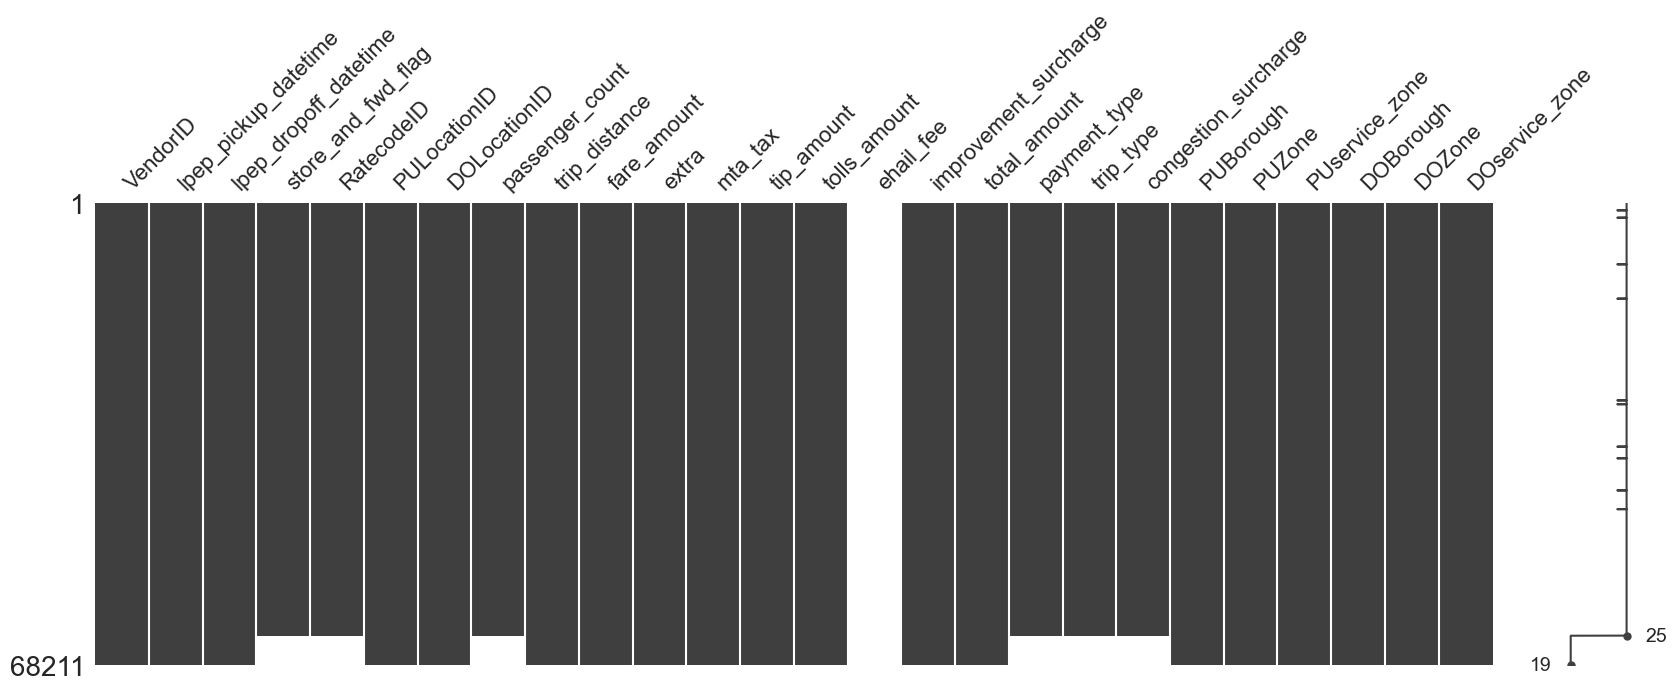

In [94]:
msno.matrix(df, figsize=(20, 6))
plt.show()

Dari matrix diatas, bisa dilihat bahwa di kolom `ehail_fee` terdapat missing value

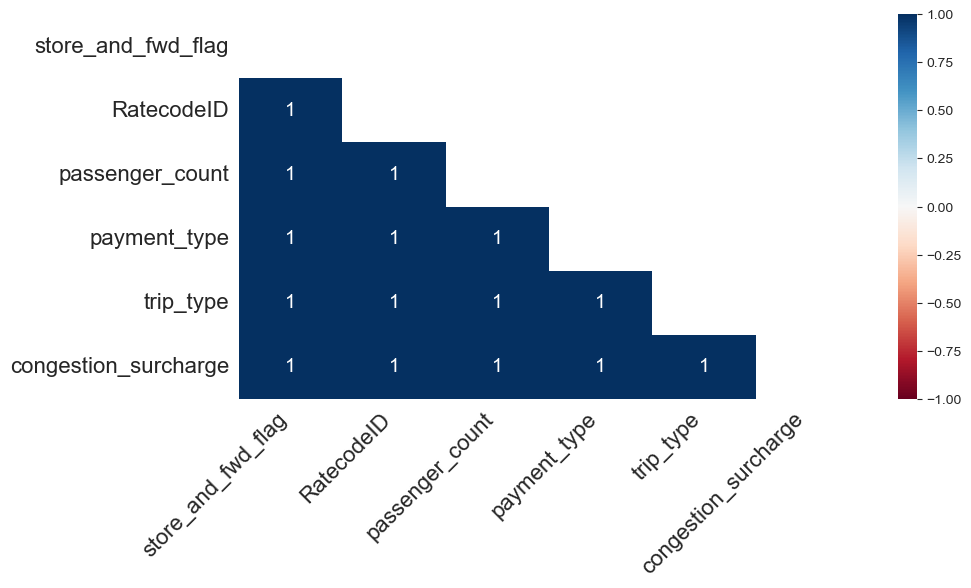

In [95]:
msno.heatmap(df, figsize=(10, 5))
plt.show()

Berdasarkan heatmap di atas, relasi missing value yang bernilai satu yang atinya ketika terdapat kolom missing value pada baris tertentu maka kolom lainnya juga missing.

# **Exploratory**

# Data Distribution

In [96]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


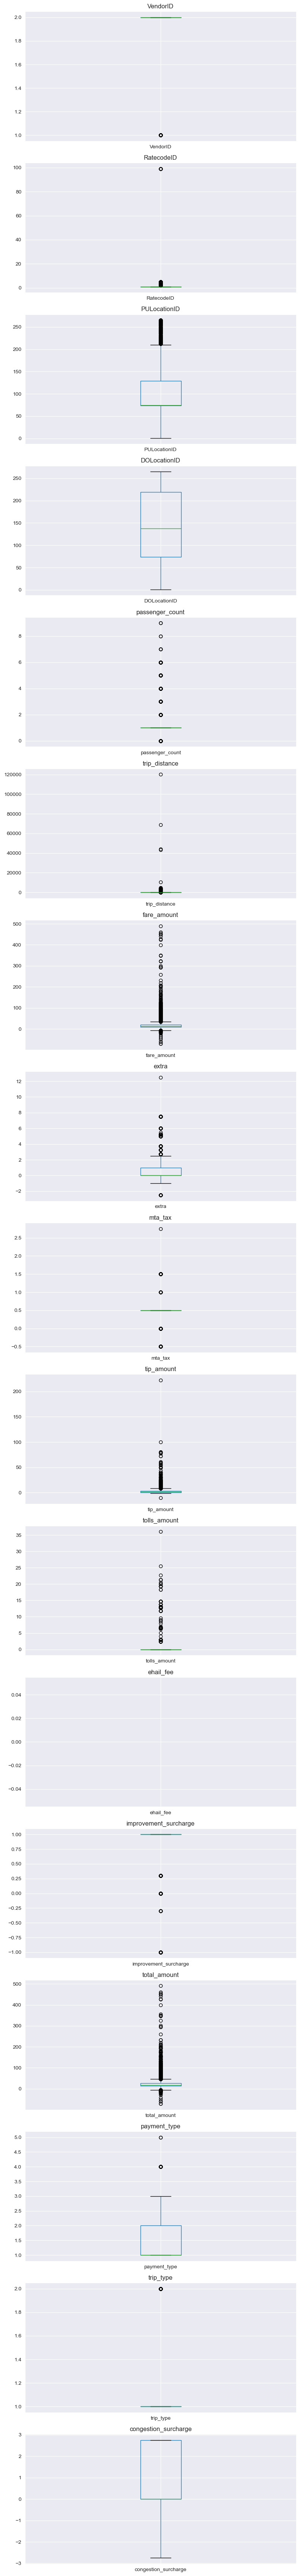

In [97]:
columns = df.columns

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, len(numeric_columns)*4))

# Iterate over each column and create a boxplot
for i, column in enumerate(numeric_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


Berdasarkan boxplot di atas, dapat disimpulkan dataset terdapat banyak outliers dan tidak ada satupun yang terdistribusi normal.

Disini saya drop sebagian besar dari kolom yang ada seperti 'VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone' karena saya anggap tidak perlu untuk analisa

In [98]:
df.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone'], axis=1, inplace=True)
print('Total data: ', len(df))
df.head()

Total data:  68211


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North


# Data Correlation

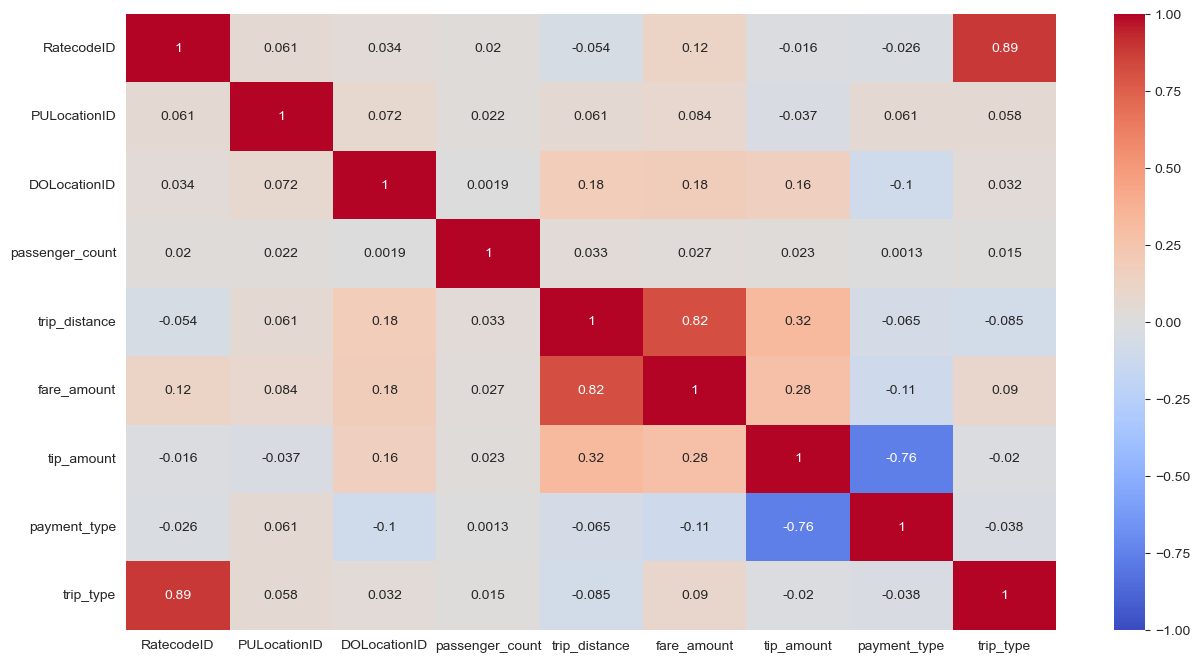

In [99]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
 

# Duplicate Value

In [100]:
df[df.duplicated()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
30233,2023-01-16 03:39:38,2023-01-16 03:54:12,1.0,235,78,1.0,2.34,0.0,0.0,2.0,1.0,Bronx,University Heights/Morris Heights,Bronx,East Tremont
30248,2023-01-16 04:11:30,2023-01-16 04:12:44,1.0,78,78,1.0,0.17,0.0,0.0,2.0,1.0,Bronx,East Tremont,Bronx,East Tremont
36901,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43,23,1.0,24.14,0.0,0.0,2.0,1.0,Manhattan,Central Park,Staten Island,Bloomfield/Emerson Hill


In [101]:
df.drop_duplicates(inplace= True)
df[df.duplicated()].sum()

lpep_pickup_datetime       0
lpep_dropoff_datetime      0
RatecodeID               0.0
PULocationID               0
DOLocationID               0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
payment_type             0.0
trip_type                0.0
PUBorough                  0
PUZone                     0
DOBorough                  0
DOZone                     0
dtype: object

Dilihat dari keseluruhan kolom record sudah tidak ada data duplicate value. Namun dengan asumsi bahwa duplicate value juga dapat dinilai berdasarkan beberapa kolom diantaranya :

    `lpep_pickup_datetime` , `lpep_dropoff_datetime` , `RatecodeID` , `PULocationID` , `DOLocationID` , `passenger_count` , `trip_distance`

In [102]:
duplicate_value = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicate_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2023-01-31 23:44:44,2023-01-31 23:45:15,5.0,264,264,1.0,0.00,-10.0,0.0,4.0,2.0,Unknown,NV,Unknown,NV


- Jika memeriksa duplicate berdasarkan kolom-kolom tersebut, maka akan terdapat duplicate value dimana value pertama bernilai amount yang negatif, sementara value kedua bernilai amount yang positif. 

- Drop value yang negatif dan tetap menjaga value yang positif.

In [103]:
dup_negatif_val = duplicate_value[df['fare_amount']<0]
dup_negatif_val 
df.drop(dup_negatif_val.index, inplace=True)
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'])]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


# Negative Value

In [104]:
pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,feature,neg_value(%)
0,lpep_pickup_datetime,0.000
1,lpep_dropoff_datetime,0.000
2,RatecodeID,0.000
3,PULocationID,0.000
4,DOLocationID,0.000
5,passenger_count,0.000
6,trip_distance,0.000
7,fare_amount,0.007
8,tip_amount,0.000
9,payment_type,0.000


Terlihat bahwa pada `fare_amount` terdapat nilai negatif yang ditandai dengan angka 0,007. Oleh karena itu, saya memutuskan untuk meng-absolut-kan nilai ini

In [105]:
negatif_val  = df[df['fare_amount']<0]
df.loc[negatif_val.index, 'fare_amount'] = df['fare_amount'].abs()

# Zero Values

In [106]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,feature,data_type,0_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,0.000
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,0.494
6,trip_distance,float64,4.822
7,fare_amount,float64,0.118
8,tip_amount,float64,42.117
9,payment_type,float64,0.000


Bisa dilihat bahwa terdapat value `0` di kolom-kolom seperti `passenger_count`, `trip_distance`, `fare_amount`, dan `tip_amount`

Ada asumsi yang memungkinkan:

- Untuk tip amount itu memungkinkan bernilai 0 yang artinya penumpang tidak memberi tip

Langkah yang saya ambil adalah:

- Mengubah value 0 pada jumlah penumpang dengan central tendency (median) dari fitur tersebut.

- Seleksi data yang memiliki fare_amount > 0 dan trip_distance > 0

In [107]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]

# Missing Values

In [108]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100
}).round(3)

,feature,data_type,null_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,6.443
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,6.443
6,trip_distance,float64,0.000
7,fare_amount,float64,0.000
8,tip_amount,float64,0.000
9,payment_type,float64,6.443


Berdasarkan pengkategorian di `RatecodeID` yang seperti dibawah ini:

 1 = Standard rate, 
 2 = JFK, 
 3 = Newark, 
 4 = Nassau or Westchester, 
 5 = Negotiated fare, 
 6 = Group ride, 

In [109]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     59400
5.0       955
2.0       131
4.0        53
3.0        20
99.0       10
Name: count, dtype: int64

In [110]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      37
Manhattan  Unknown       7
Bronx      Unknown       2
Manhattan  Manhattan     2
Unknown    Unknown       2
Brooklyn   Unknown       1
Manhattan  EWR           1
Unknown    Queens        1
Name: count, dtype: int64

- Berdasarkan informasi di atas, diketahui bahwa value unknown tersebut kemungkinan besar adalah Kota Nassau atau Westchester

- Namun karena analisis ini hanya fokus terhadap kota New York maka data untuk tujuan Nassau atau Wetchester akan di drop

- Sebelum didrop, ada beberapa kesalahan record harus ditangani pada ratecode tersebut


In [111]:
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']=='EWR'), 'RatecodeID'] = 3
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']!='Unknown'), 'RatecodeID'] = 1

df.drop(df[df['PUBorough']=='Unknown'].index, inplace=True)
df.drop(df[df['DOBorough']=='Unknown'].index, inplace=True)

df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 3

In [112]:
df['RatecodeID'].fillna(1, inplace=True)
print(df['RatecodeID'].value_counts())
print('Total NaN values: ', len(df[df['RatecodeID'].isna()]))

RatecodeID
1.0    63327
5.0      878
2.0      170
3.0       16
Name: count, dtype: int64
Total NaN values:  0


Kemudian, saya akan mengisi missing value menggunakan median dari kolom tersebut

In [113]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

print(df['passenger_count'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

passenger_count
1.0    55486
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64
Total NaN values:  0


- Berdasarkan background data, kita mengetahui bahwa tip untuk metode kartu kredit akan terisi secara otomatis. maka dapat disimpulkan jika tips > 0 maka metode yang digunakan adalah kartu kredit.

- Isi sisa missing value dengan opsi unknown yang tersedia

In [114]:
print(df['payment_type'].value_counts())
print('Total NaN values: ', len(df[df['payment_type'].isna()]))

payment_type
1.0    38278
2.0    21690
3.0      221
4.0       49
Name: count, dtype: int64
Total NaN values:  4153


In [115]:
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    34706
2.0        1
Name: count, dtype: int64

In [116]:
df.loc[(df['tip_amount']>0) & (df['payment_type']==2), 'payment_type'] = 1
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    34707
Name: count, dtype: int64

In [117]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)
df['payment_type'].value_counts()

payment_type
1.0    41994
2.0    21689
5.0      438
3.0      221
4.0       49
Name: count, dtype: int64

- Berdasarkan heatmap saat skimming, `trip_type` sangat dipengaruhi oleh `RatecodeID` dengan nilai korelasi sebesar 0,89

In [118]:
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        59205
           2.0            2
2.0        1.0          129
3.0        1.0           15
5.0        1.0          111
           2.0          767

In [119]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4120
2.0,41
3.0,1


- Bedasarkan kode dari dataset dataset bahwa RatecodeID = 1, 99% memiliki tipe perjalanan (trip_type) dengan value 1, sedangkan RatecodeID 2 dan 3 semuanya memiliki trip_type 1. Data yang memiliki missing value pada kolom trip_type memiliki value RatecodeID yaitu 1, 2 dan 3. 

- Maka isi missing value pada kolom trip_type dengan nilai 1

In [120]:
df['trip_type'].fillna(1, inplace=True)
df['trip_type'].value_counts()

trip_type
1.0    63622
2.0      769
Name: count, dtype: int64

In [121]:
print('Total data:', len(df))
df.head()

Total data: 64391


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.7,0.00,2.0,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East


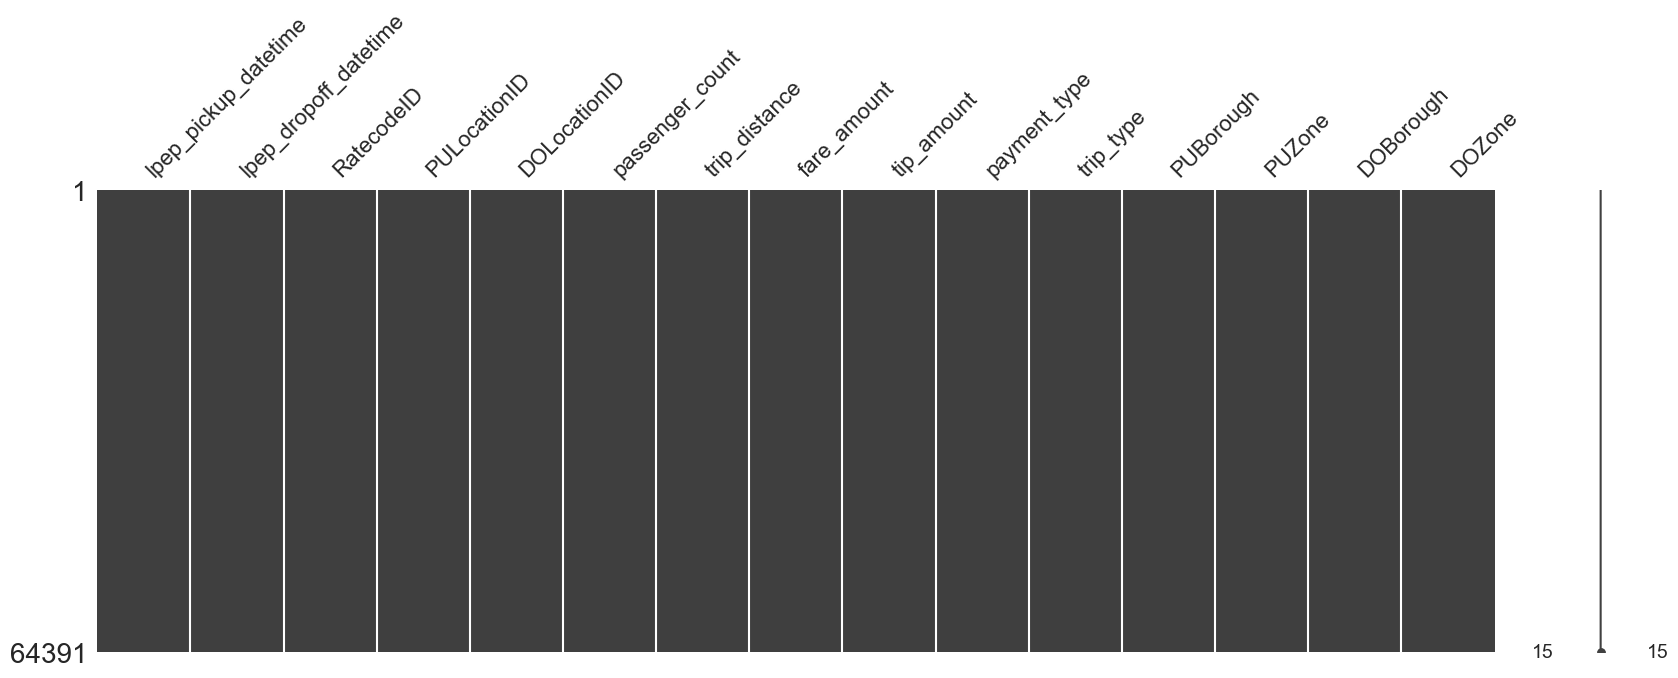

In [122]:
msno.matrix(df, figsize=(20, 6))
plt.show()

# **Outlier Handling**

# Pickup & Dropoff Datetime

In [123]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [124]:
outliers = df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]
outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,2.0,1.0,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


In [125]:
df.drop(outliers.index, inplace=True)
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


In [126]:
time_bins = [0, 5, 11, 15, 20, 24] 
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
df['pickup_time'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

df['day_category'] = df['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

# RatecodeID

In [127]:
df['RatecodeID'] = df['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
df['RatecodeID'].value_counts()

RatecodeID
Standard rate      63324
Negotiated fare      877
JFK Airport          170
Newark Airport        16
Name: count, dtype: int64

# Passenger Count

In [128]:
df['passenger_count'].value_counts()

passenger_count
1.0    55483
2.0     4869
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64

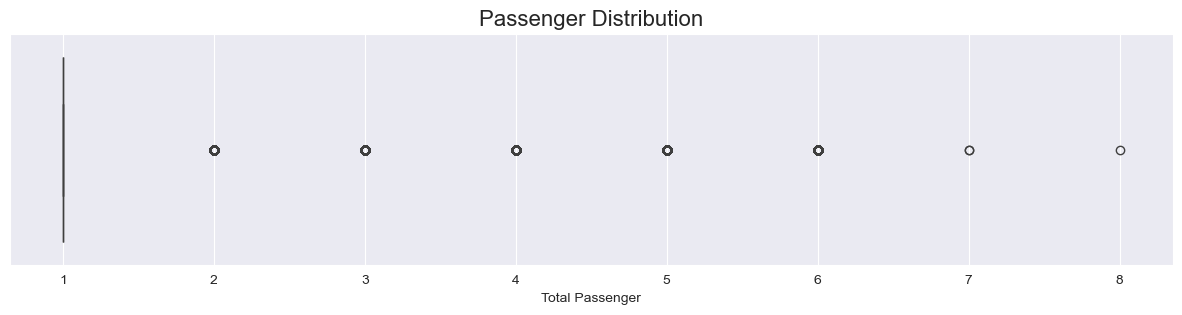

In [129]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='passenger_count', color=color[0])
plt.xlabel('Total Passenger')
plt.title('Passenger Distribution', fontsize=16)

plt.show()

Berdasarkan peraturan dari website www.nyc.gov, jumlah maksimum penumpang yang diperbolehkan dalam taksi adalah 4 atau 5 penumpang, kecuali penumpang tambahan harus diterima jika demikian. penumpang berusia di bawah tujuh (7) tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang.

In [130]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: '>3' if x>3 else str(x))
df['passenger_count'].value_counts()

passenger_count
1.0    55483
2.0     4869
>3      3138
3.0      897
Name: count, dtype: int64

# Trip Distance

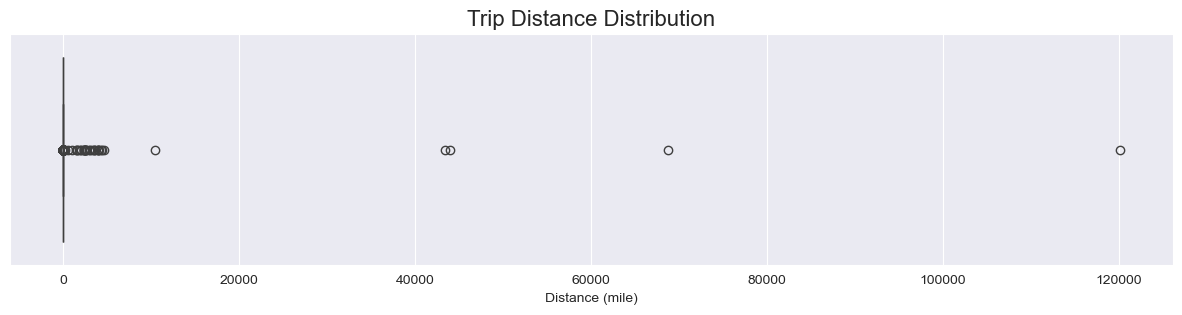

In [131]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

Asumsi yang bisa diambil, taksi yang menempuh jarak kurang dari 1 km (0,62 miles) merupakan record yang tidak wajar ataupun record yang gagal seperti kemungkinan penumpang atau driver membatalkan pesanan, maka dataset yang memiliki nilai tersebut akan didrop

In [132]:
print('Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles):', len(df[df['trip_distance']<0.62]))
df = df[df['trip_distance']>0.62]

Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles): 3465


- Terdapat extreme outliers pada data jarak perjalanan taxi

- Pertama ubah terlebih dahulu extreme outliers tersebut

In [133]:
df[df['trip_distance']>50][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount']].sort_values(by='trip_distance', ascending=True).head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount
7322,2023-01-05 09:00:03,2023-01-05 15:18:38,134,134,66.18,15.00
64695,2023-01-06 14:16:00,2023-01-06 14:59:00,82,130,137.95,44.90
66580,2023-01-20 09:16:00,2023-01-20 09:59:00,133,90,254.65,45.44
63995,2023-01-01 12:35:00,2023-01-01 12:58:00,181,137,579.63,28.49
65149,2023-01-10 15:40:00,2023-01-10 16:24:00,26,37,1082.45,49.80


Ada 4 trip yang merupakan extreme outliers dimana terdapat jarak lebih dari 120 miles

In [134]:
outliers = df[df['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance']]
print('Total outliers:',len(outliers))
outliers.head()

Total outliers: 38


,PULocationID,DOLocationID,trip_distance
7322,134,134,66.18
33373,82,236,1571.97
63995,181,137,579.63
64446,193,140,2555.47
64558,49,65,3077.89


Kita akan coba ubah data extreme outliers di atas dengan nilai central tendency (median) dari trip_distance untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [135]:
ct_distance_byid = df[df['trip_distance']<50].groupby(['PULocationID', 'DOLocationID']).agg(count=('trip_distance', 'count'),
                                                                                            avg_distance=('trip_distance', 'mean'),
                                                                                            median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byid.sample(7, random_state=3)

,PULocationID,DOLocationID,count,avg_distance,median_distance
4180,220,127,2,8.5950,8.595
1947,80,87,2,6.5800,6.580
4548,244,92,1,13.2200,13.220
4112,212,248,1,0.6600,0.660
737,41,120,4,2.7625,2.775
3833,189,17,2,1.6900,1.690
285,25,24,2,11.2100,11.210


In [136]:
distance_byid = pd.merge(outliers, ct_distance_byid, on=['PULocationID', 'DOLocationID'], how='left')
distance_byid.drop(columns='count', axis=1, inplace=True)
distance_byid.index = outliers.index
display(distance_byid.head(5))

print('Hasil Inputasi:')
df.loc[outliers.index, 'trip_distance'] = distance_byid['median_distance']
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'trip_distance']].head()

,PULocationID,DOLocationID,trip_distance,avg_distance,median_distance
7322,134,134,66.18,1.129205,0.910
33373,82,236,1571.97,8.023333,8.080
63995,181,137,579.63,7.460000,7.460
64446,193,140,2555.47,2.410000,2.470
64558,49,65,3077.89,1.025000,1.025


Hasil Inputasi:


,PULocationID,DOLocationID,trip_distance
7322,134,134,0.910
33373,82,236,8.080
63995,181,137,7.460
64446,193,140,2.470
64558,49,65,1.025


In [137]:
isna = df.loc[df['trip_distance'].isna()][['PUBorough', 'DOBorough', 'trip_distance']]
isna

,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,NaN
65306,Brooklyn,Queens,NaN
65491,Bronx,Manhattan,NaN
66344,Brooklyn,Brooklyn,NaN
66580,Brooklyn,Manhattan,NaN
66724,Manhattan,Bronx,NaN
67307,Bronx,Bronx,NaN


In [138]:
ct_distance_byborough = df[df['trip_distance']<70].groupby(['PUBorough', 'DOBorough']).agg(count=('trip_distance', 'count'), avg_distance=('trip_distance', 'mean'), median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byborough.sample(5, random_state=4)

,PUBorough,DOBorough,count,avg_distance,median_distance
20,Staten Island,Brooklyn,1,11.390000,11.39
19,Queens,Queens,14119,2.674917,1.97
0,Bronx,Bronx,519,3.085096,2.52
3,Bronx,Queens,25,12.287600,10.36
6,Brooklyn,EWR,7,15.090000,15.08


In [139]:
distance_byborough = pd.merge(isna, ct_distance_byborough, on=['PUBorough', 'DOBorough'], how='left')
distance_byborough.index = isna.index
display(distance_byborough)

print('Hasil Inputasi:')
df.loc[isna.index, 'trip_distance'] = distance_byborough['median_distance'].round(2)
display(df.loc[isna.index][['PUBorough', 'DOBorough', 'trip_distance']])

,PUBorough,DOBorough,trip_distance,count,avg_distance,median_distance
65149,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
65306,Brooklyn,Queens,NaN,438,9.387329,9.540
65491,Bronx,Manhattan,NaN,253,4.992470,3.400
66344,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
66580,Brooklyn,Manhattan,NaN,1586,5.966778,5.635
66724,Manhattan,Bronx,NaN,1430,4.113755,3.290
67307,Bronx,Bronx,NaN,519,3.085096,2.520


Hasil Inputasi:


,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,2.01
65306,Brooklyn,Queens,9.54
65491,Bronx,Manhattan,3.40
66344,Brooklyn,Brooklyn,2.01
66580,Brooklyn,Manhattan,5.64
66724,Manhattan,Bronx,3.29
67307,Bronx,Bronx,2.52


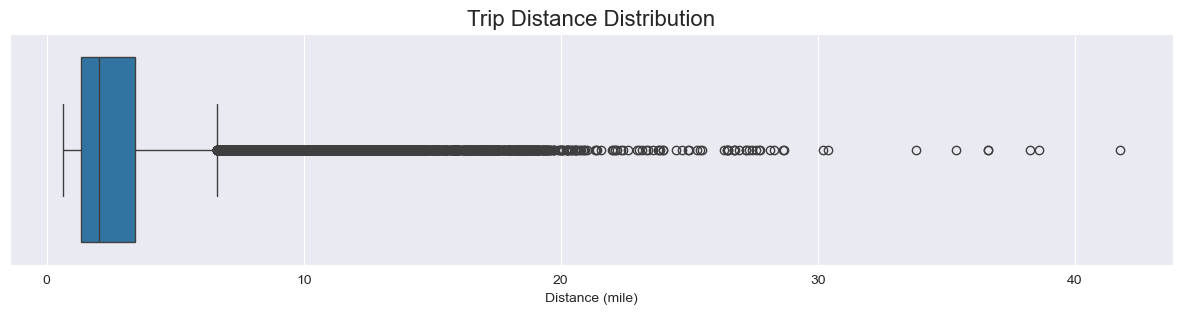

In [140]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

Setelah selesai mengatasi extreme outliers selanjutnya mengatasi outliers biasa dengan cara membuat bins

In [141]:
bins_of_distance = [0, 2, 6, 10, np.inf] 
labels_of_distance = ['<2 miles', '3-6 miles', '7-10 miles', '>10 miles']

df['distance_bins'] = pd.cut(df['trip_distance'], bins=bins_of_distance, labels=labels_of_distance)

In [142]:
df['distance_bins'].value_counts()

distance_bins
<2 miles      29984
3-6 miles     24711
7-10 miles     4590
>10 miles      1543
Name: count, dtype: int64

# Feature Creation - Trip Duration

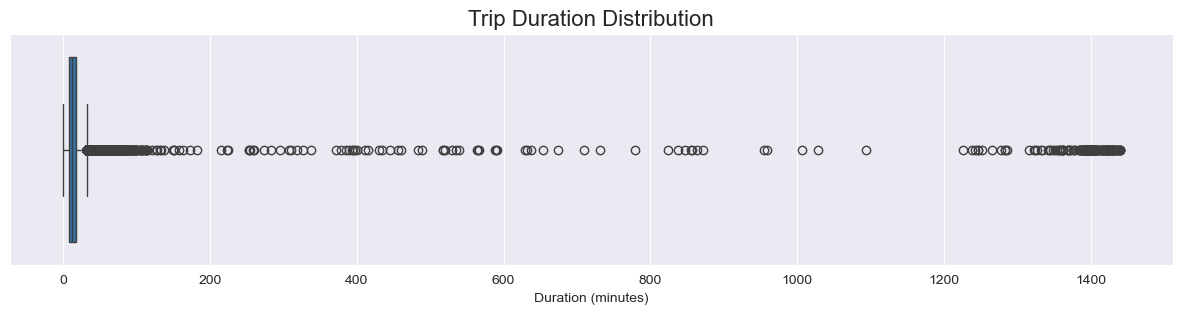

In [143]:
diff = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
df['trip_duration'] = diff.round(2)

plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=16)


plt.show()

Ada perjalanan yang terjadi selama 1 hingga 2 menit saja, dan itu normal, salah satu faktor penyebab adalah penumpang atau driver yang membatalkan pesanan

In [144]:
print('Banyaknya data yang memiliki jarak kurang dari 2 menit:', len(df[df['trip_duration']<=2]))
df = df[df['trip_duration']>2]

Banyaknya data yang memiliki jarak kurang dari 2 menit: 130


In [145]:
df[df['trip_distance']==df['trip_distance'].max()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration
8072,2023-01-05 14:53:00,2023-01-05 16:19:20,Standard rate,130,1,1.0,41.74,114.0,0.0,1.0,1.0,Queens,Jamaica,EWR,Newark Airport,Noon,Weekdays,>10 miles,86.33



- Dengan jarak terjauh yang dimiliki yaitu 41.74 mil apabila di tempuh dengan kecepatan rata-rata terendah di Kota New York yaitu 10 mph maka waktu yang diperlukan yaitu 4.17 jam atau sekitar 250 menit. Maka dapat di asumsikan untuk durasi yang lebih dari 250 menit merupakan record extreme outliers (tidak wajar)

- Sama seperti fitur distance sebelumnya , kita akan coba ubah data extreme outliers dengan nilai central tendency (median) dari trip_duration untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [146]:
outliers = df[df['trip_duration']>250][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total extreme outliers : ', len(outliers))
outliers.head()

Total extreme outliers :  225


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23


In [147]:
ct_duration_byid = df[df['trip_duration']<250].groupby(['PULocationID', 'DOLocationID']).agg(count=('distance_bins', 'count'), 
                                                                                                 mean_duration=('trip_duration', 'mean'), 
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byid.sample(5, random_state=3)

,PULocationID,DOLocationID,count,mean_duration,median_duration
2105,83,10,1,25.500000,25.50
1142,52,237,1,37.270000,37.27
3070,134,130,15,8.686667,8.68
2560,112,62,2,19.340000,19.34
4170,220,136,1,14.550000,14.55


In [148]:
duration_byid = pd.merge(outliers, ct_duration_byid, on=['PULocationID', 'DOLocationID'], how='left')
duration_byid.drop(columns='count', axis=1, inplace=True)
duration_byid.index = outliers.index
display(duration_byid.head())

print('Hasil inputasi:')
df.loc[outliers.index, 'trip_duration'] = duration_byid['median_duration'].round(2)
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47,24.526667,24.580
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02,12.232537,11.880
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48,22.133333,20.350
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02,12.302649,9.250
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23,23.145000,22.445


Hasil inputasi:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,24.58
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,11.88
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,20.35
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,9.25
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,22.44


In [149]:
isna = df.loc[outliers.index][df['trip_duration'].isna()][['PUBorough', 'DOBorough', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total NaN Value : ', len(isna))
isna

Total NaN Value :  13


,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN
41975,Queens,Queens,2023-01-21 17:19:27,2023-01-22 00:00:00,NaN
42432,Brooklyn,Brooklyn,2023-01-21 20:29:58,2023-01-22 02:59:25,NaN
44216,Bronx,Bronx,2023-01-22 21:35:25,2023-01-23 20:42:11,NaN
52135,Bronx,Manhattan,2023-01-26 12:45:43,2023-01-27 00:00:00,NaN
56314,Brooklyn,Manhattan,2023-01-28 04:15:15,2023-01-29 03:58:28,NaN


In [150]:
ct_duration_byborough = df[df['trip_duration']<250].groupby(['PUBorough', 'DOBorough']).agg(count=('distance_bins', 'count'), 
                                                                                                 mean_duration=('trip_duration', 'mean'), 
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byborough.sample(10, random_state=5)

,PUBorough,DOBorough,count,mean_duration,median_duration
18,Queens,Manhattan,902,26.873925,24.86
2,Bronx,Manhattan,253,20.556403,17.78
17,Queens,EWR,7,58.354286,55.33
19,Queens,Queens,14086,13.154392,11.05
20,Staten Island,Brooklyn,1,36.550000,36.55
21,Staten Island,Staten Island,7,11.918571,8.80
10,Manhattan,Bronx,1431,17.177945,15.55
5,Brooklyn,Brooklyn,6006,16.416354,13.92
1,Bronx,Brooklyn,6,40.591667,42.00
13,Manhattan,Manhattan,33758,12.402218,10.80


In [151]:
duration_byborough = pd.merge(isna, ct_duration_byborough, on=['PUBorough', 'DOBorough'], how='left')
duration_byborough.drop(columns='count', axis=1, inplace=True)
duration_byborough.index = isna.index
display(duration_byborough.head())

print('Hasil inputasi:')
df.loc[isna.index, 'trip_duration'] = duration_byborough['median_duration'].round(2)
df.loc[isna.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN,13.154392,11.05
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN,16.416354,13.92
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN,16.416354,13.92
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN,13.154392,11.05
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN,26.873925,24.86


Hasil inputasi:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,223,8,2023-01-01 13:07:46,2023-01-01 19:45:18,11.05
16126,17,256,2023-01-09 13:44:30,2023-01-10 11:07:20,13.92
29711,150,123,2023-01-15 17:52:52,2023-01-15 22:11:55,13.92
30240,129,16,2023-01-16 03:13:50,2023-01-17 00:00:00,11.05
40817,179,114,2023-01-21 03:09:37,2023-01-22 01:46:44,24.86


In [152]:
df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 00:47:39,24.58
108,260,223,2023-01-01 01:53:59,2023-01-01 02:05:52,11.88
118,129,37,2023-01-01 01:25:46,2023-01-01 01:46:07,20.35
207,129,129,2023-01-01 03:12:42,2023-01-01 03:21:57,9.25
262,65,37,2023-01-01 04:03:36,2023-01-01 04:26:02,22.44


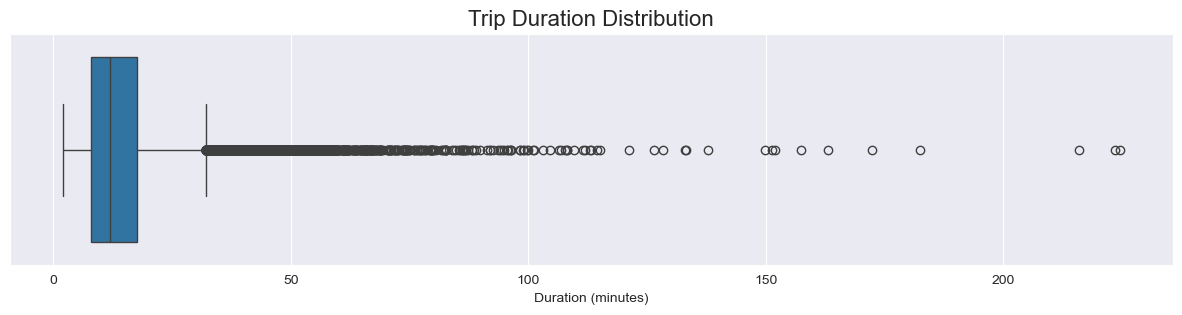

In [153]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=16)

plt.show()

In [154]:
bins_of_duration = [0, 10, 20, 30, np.inf] 
labels_of_duration = ['<10 minutes', '11-20 minutes', '21-30 minutes', '>30 minutes']

df['duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

df['duration_bins'].value_counts()

duration_bins
11-20 minutes    26030
<10 minutes      23321
21-30 minutes     7711
>30 minutes       3636
Name: count, dtype: int64

Tujuan dari pembuatan bins ini adalah untuk mengatasi outlier, sedangkan pengisian data dengan median itu bertujuan untuk mengatasi extreme outlier dan value kosong apabila dilihat dari kategori tertentu

# Trip Type

In [155]:
df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

trip_type
Street-hail    60150
Dispatch         548
Name: count, dtype: int64

# Payment Type

In [156]:
df['payment_type']=df['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
df['payment_type'].value_counts()

payment_type
Credit card    40261
Cash           19885
Unknown          435
No charge         98
Dispute           19
Name: count, dtype: int64

<Axes: >

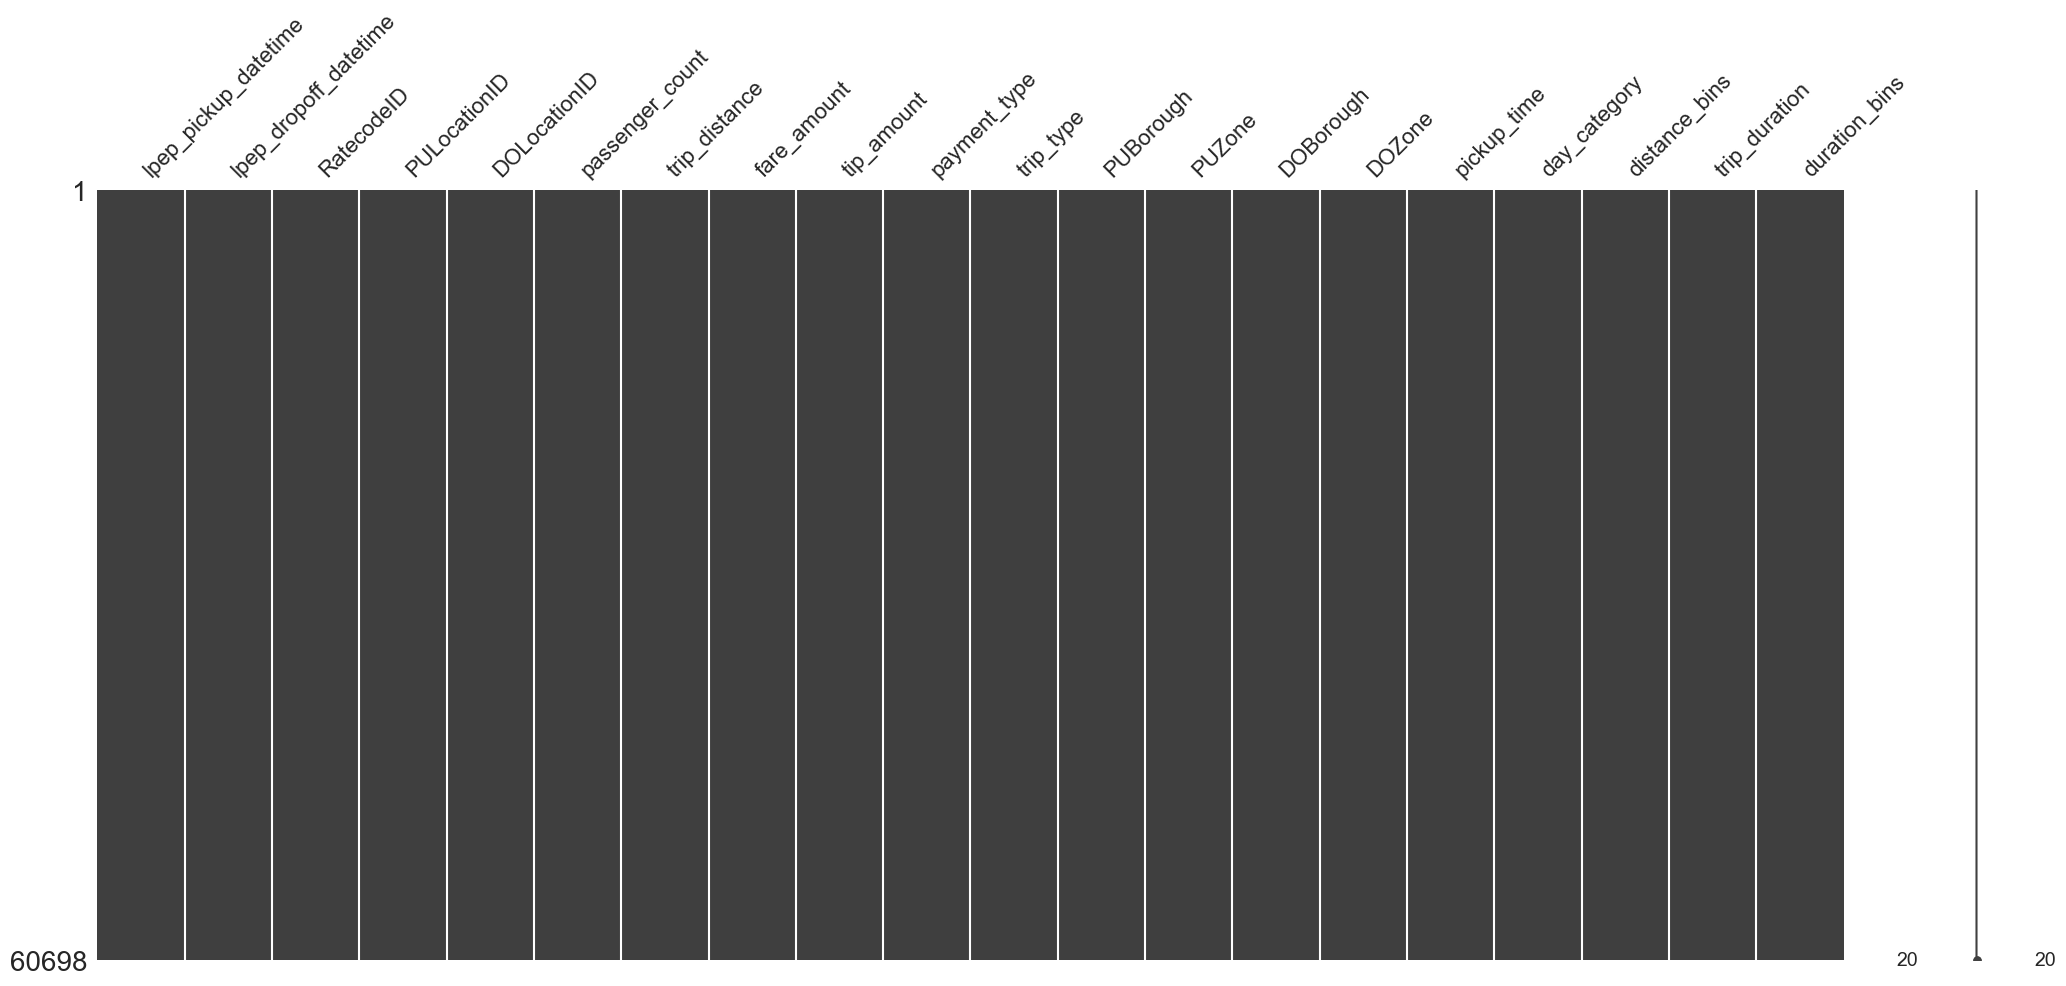

In [157]:
msno.matrix(df)

## **Comparison Analysis**

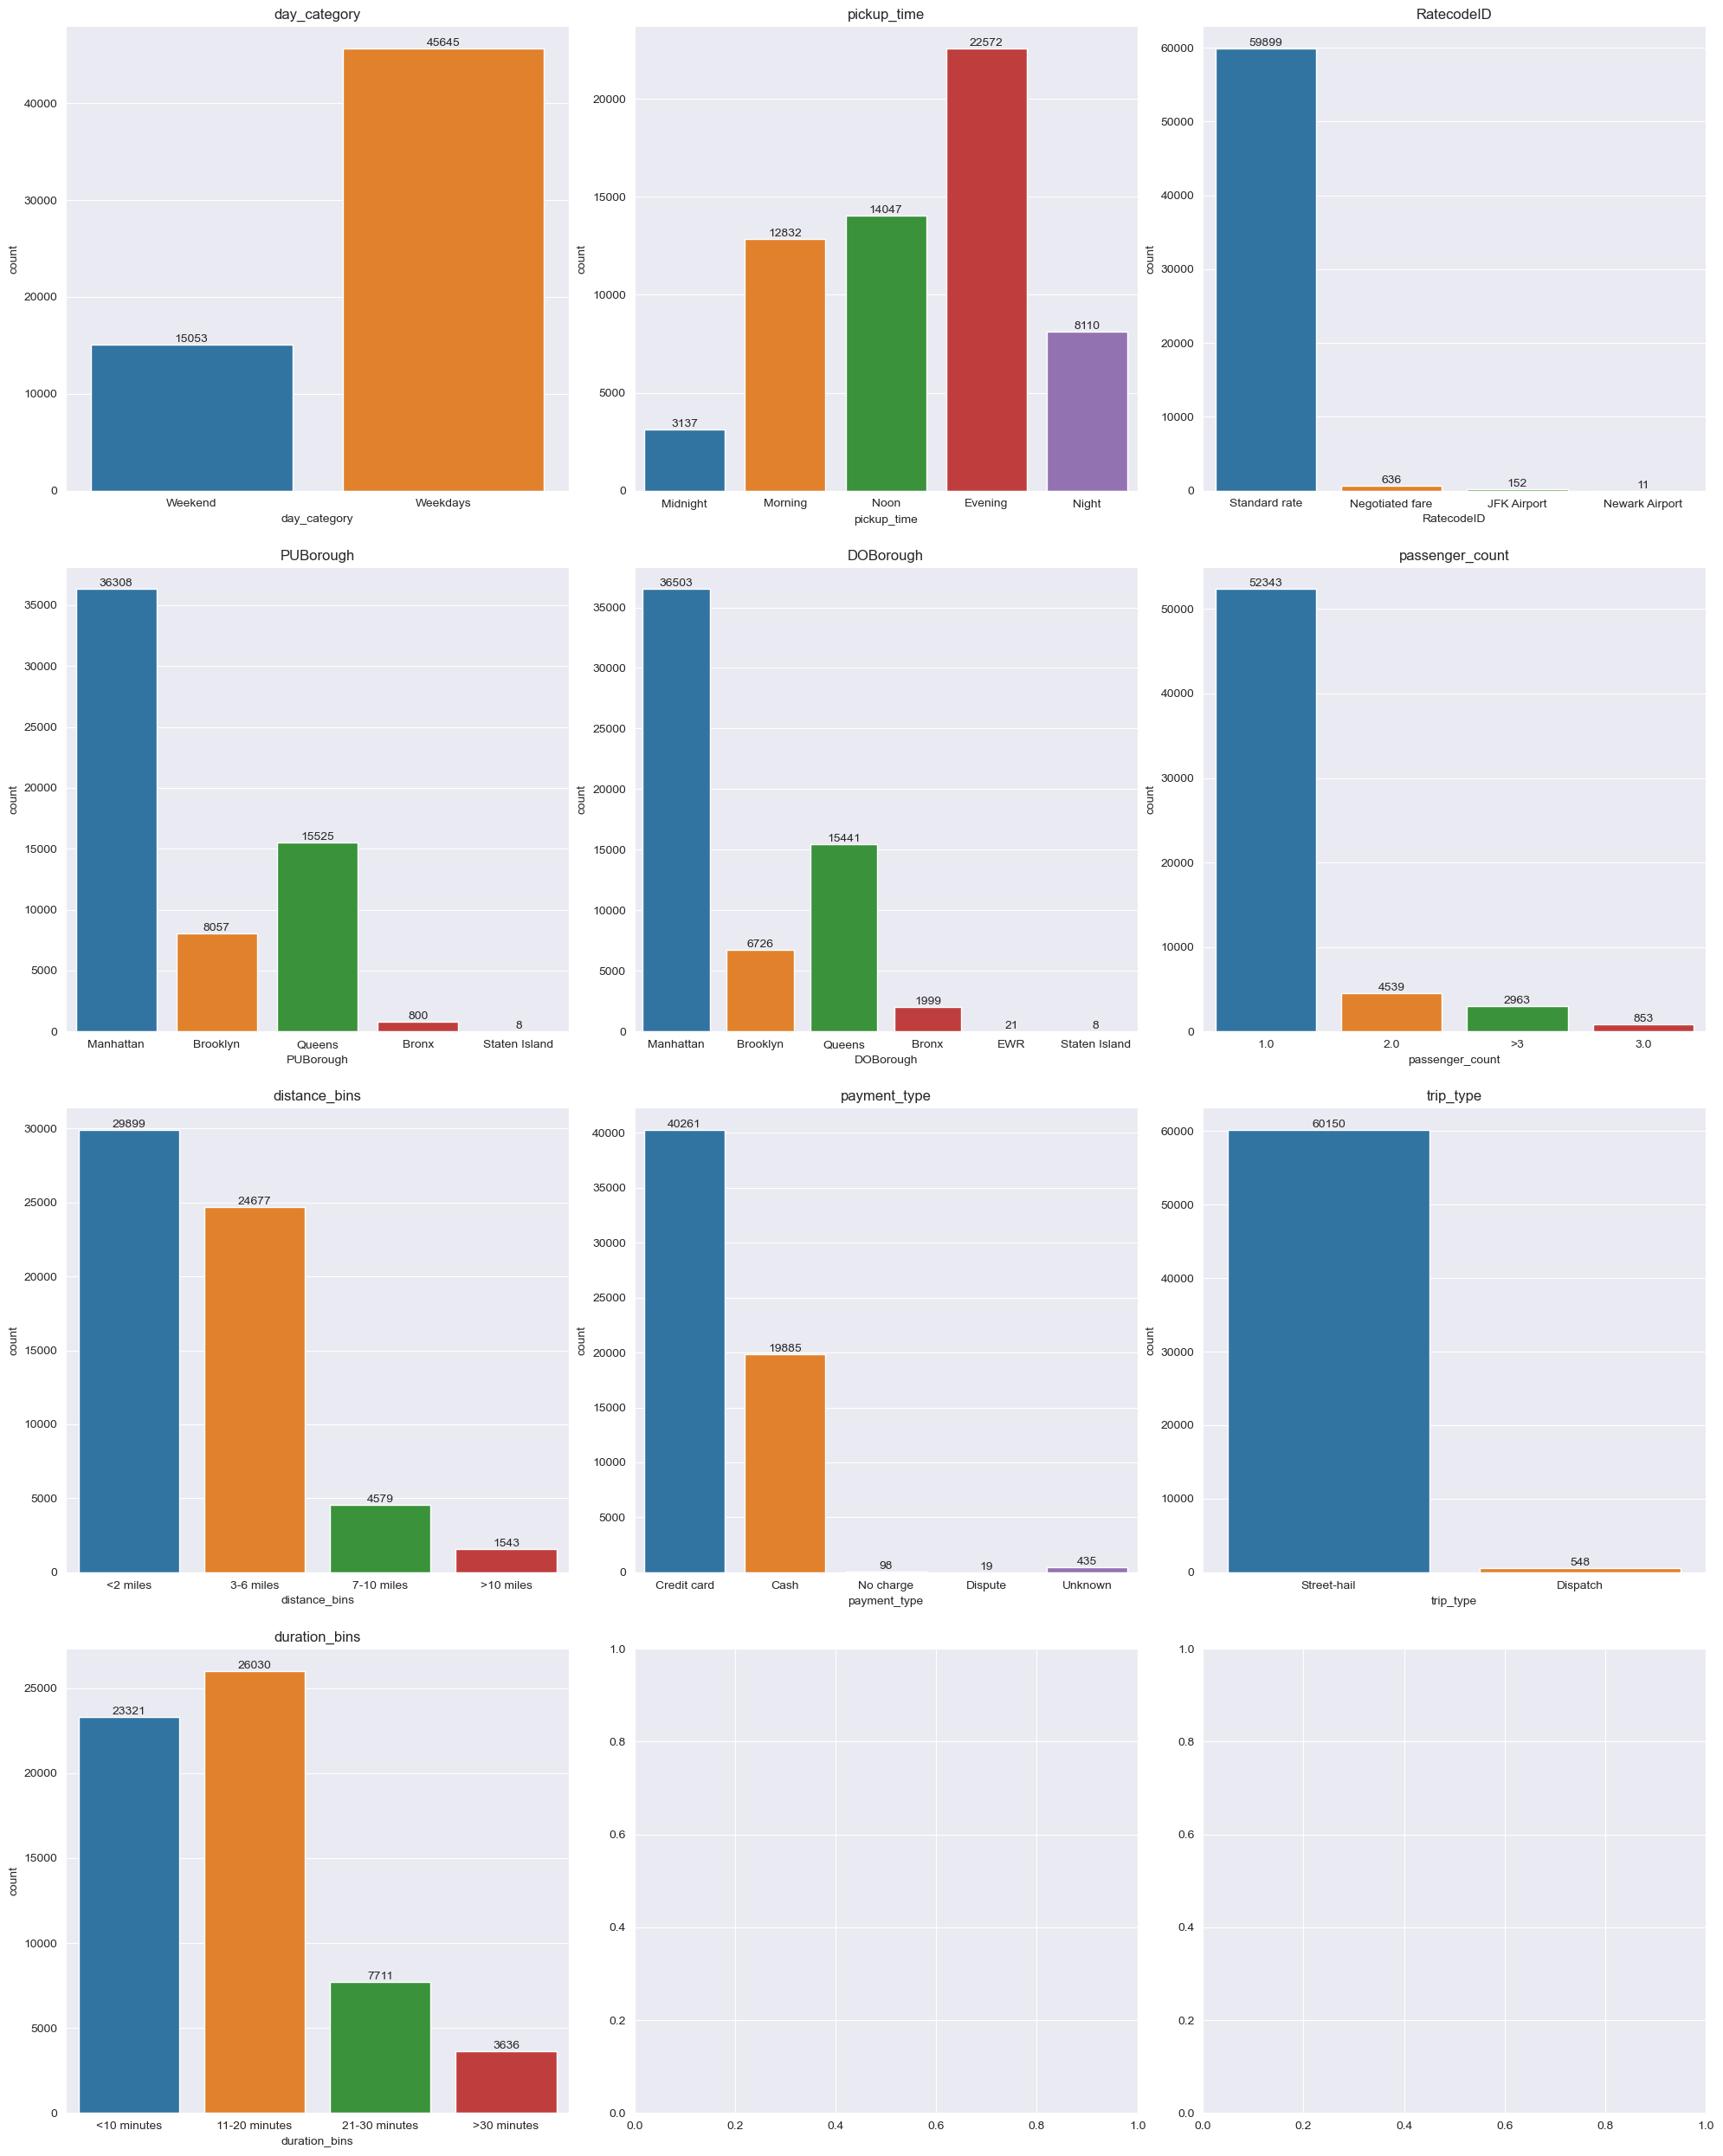

In [158]:
cols = ['day_category','pickup_time', 'RatecodeID', 'PUBorough', 'DOBorough', 'passenger_count', 'distance_bins',  'payment_type', 'trip_type', 'duration_bins']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 25))
axs = axs.flatten()

for i, col in enumerate(cols):
    bars = sns.countplot(data=df, x=col, palette=color, ax=axs[i])
    axs[i].set_title(col)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axs[i].text(x_value, y_value, label, ha='center', va='bottom') 

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

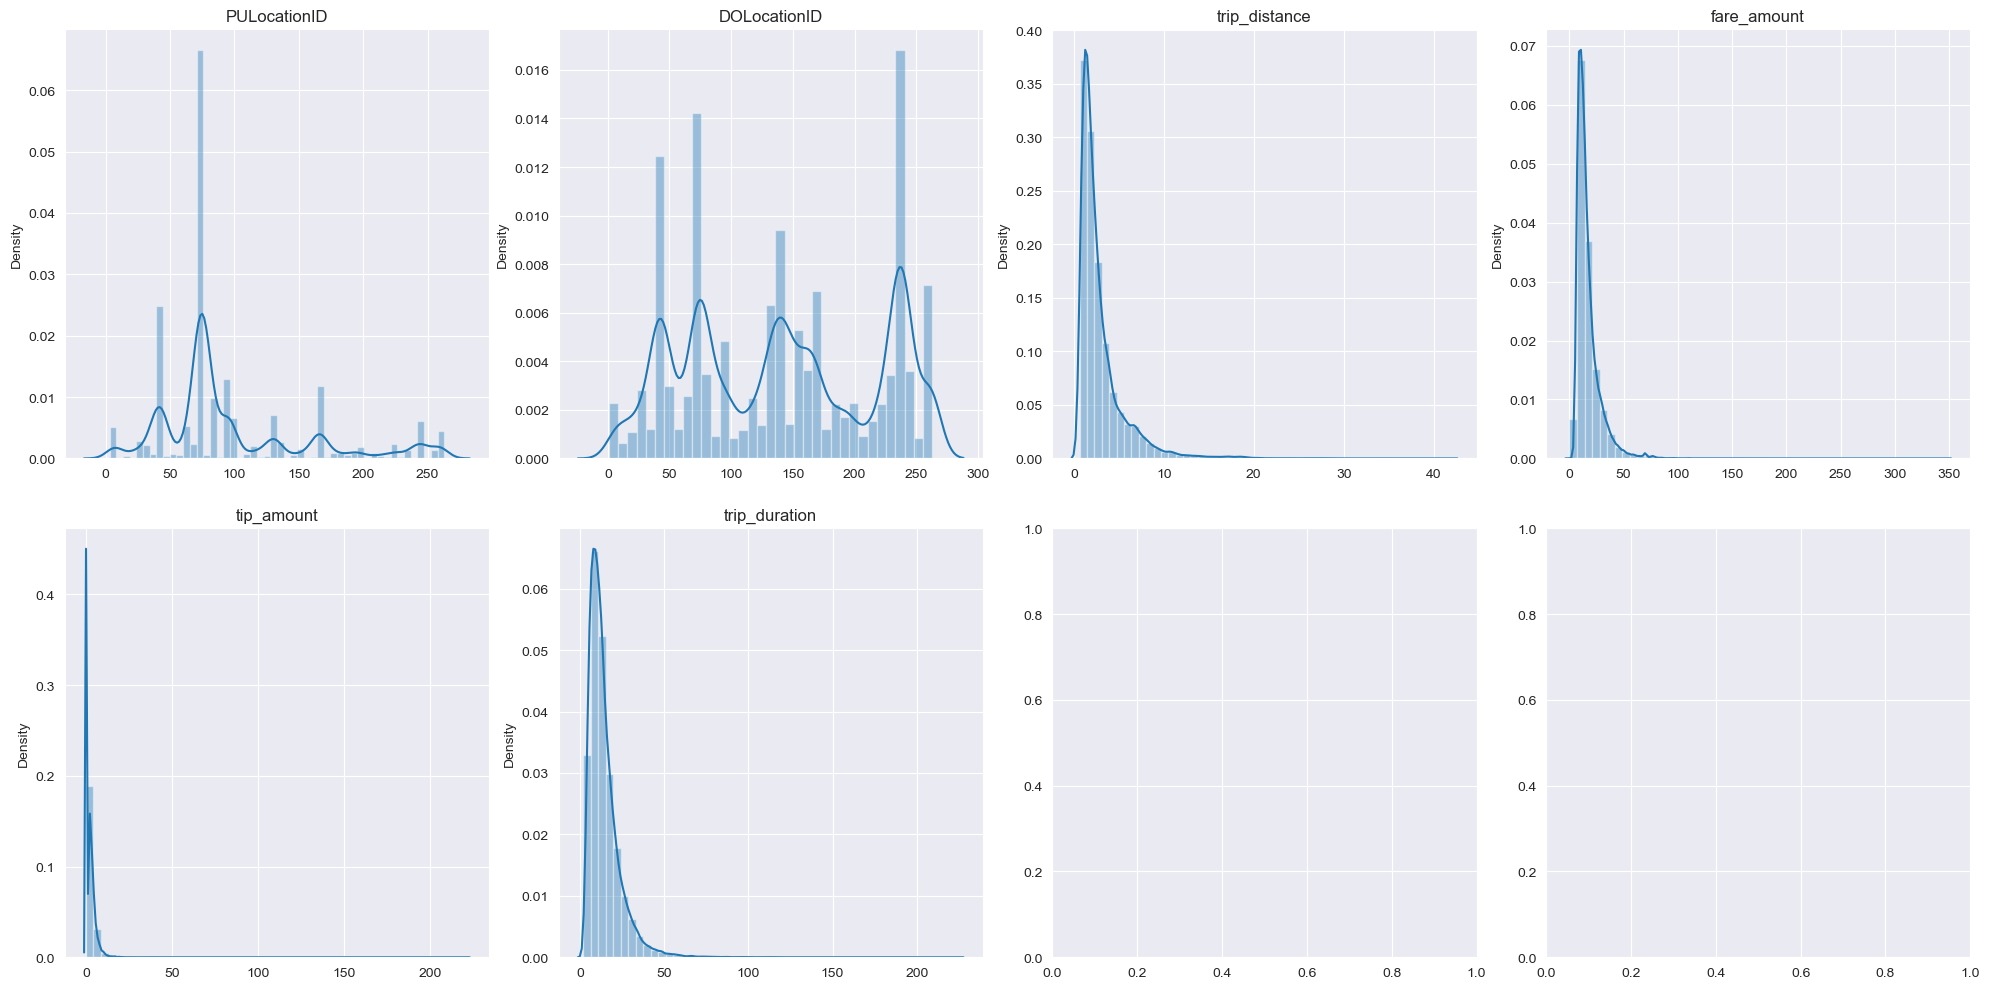

In [159]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    axs[index].set_title(k)
    sns.distplot(x=df[k], ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

Insight dari diagram ini adalah, bahwa tidak ada yang distribusinya normal

# **Data Analysis**

In [160]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Demand Berdasarkan Waktu 

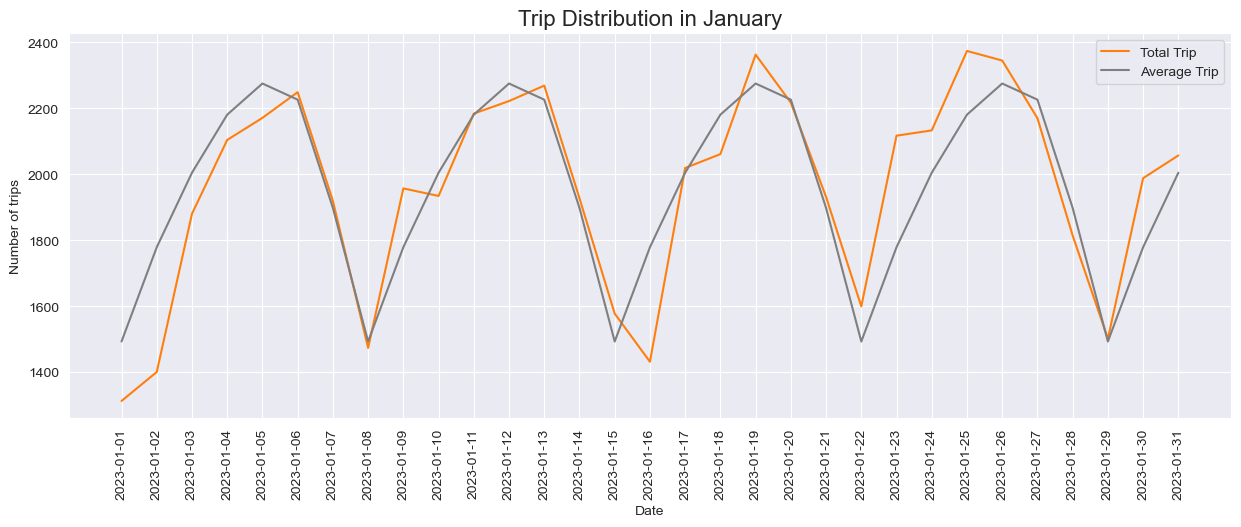

In [161]:
trip_monthly = df.groupby(df['lpep_pickup_datetime'].dt.date).agg(trip_bydate=('lpep_pickup_datetime', 'count')).reset_index()
trip_monthly['lpep_pickup_datetime'] = pd.to_datetime(trip_monthly['lpep_pickup_datetime'])
trip_monthly['day_of_week'] = trip_monthly['lpep_pickup_datetime'].dt.day_name()

trip_dayly = trip_monthly.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_dayly['day_cat']= trip_dayly['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

trip_dayly_cat = trip_dayly.groupby('day_cat').agg(trip_bycat=('trip_byday', 'sum')).reset_index()

trip_merge = pd.merge(trip_monthly, trip_dayly, on='day_of_week', how='left')
trip_merge = pd.merge(trip_merge, trip_dayly_cat, on='day_cat', how='left')

plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='trip_bydate', 
             color=color[1],
             label = 'Total Trip')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='avg_trip',
             color=color[7],
             label = 'Average Trip')

plt.title('Trip Distribution in January', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(trip_monthly['lpep_pickup_datetime'], rotation=90)

plt.show()

Insight yang didapat bahwa di bulan Januari, total trip paling tinggi ada di tanggal 19 dan 25 sedangkan yang paling rendah adalah di tahun baru atau pada tanggal 1 Januari

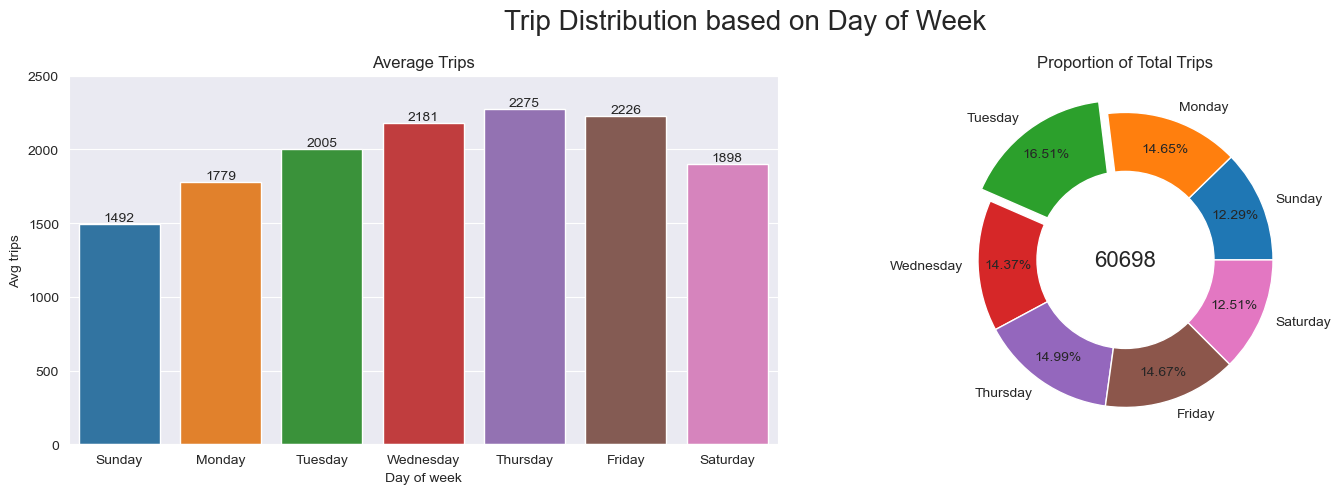

In [162]:
plt.figure(figsize=(15,5))

plt.suptitle('Trip Distribution based on Day of Week', fontsize=20)
plt.subplot(1,2,1)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(), 
                   y=trip_merge['avg_trip'].unique().tolist(), 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 20
    label = "{:.0f}".format(trip_merge['avg_trip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Trips')
plt.xlabel('Day of week')
plt.ylabel('Avg trips')
plt.yticks(np.arange(0, 2501, 500))

plt.subplot(1,2,2)
plt.pie(x=trip_merge['trip_byday'].unique().tolist(), 
        labels=trip_merge['day_of_week'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0.1,0,0,0,0), 
        colors=color)
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, trip_merge['trip_byday'].unique().sum(), ha='center', va='center', fontsize=16)
plt.title('Proportion of Total Trips')

plt.tight_layout()
plt.show()

`Insights`

- Proporsi tertinggi total trip selama bulan januari yaitu hari Selasa sebesar 16% dari total banyaknya perjalanan

- Meski demikian, berdasarkan rata-rata banyaknya perjalanan perhari, perjalanan perhari tertinggi terjadi pada hari kamis mencapai 2275 perjalanan perhari

- Ketika memasuki hari-hari weekdays jumlah perjalanan secara konsisten naik

- Namun ketika memasuki hari weekend jumlah perjalanan perhari menurun cukup signifikan

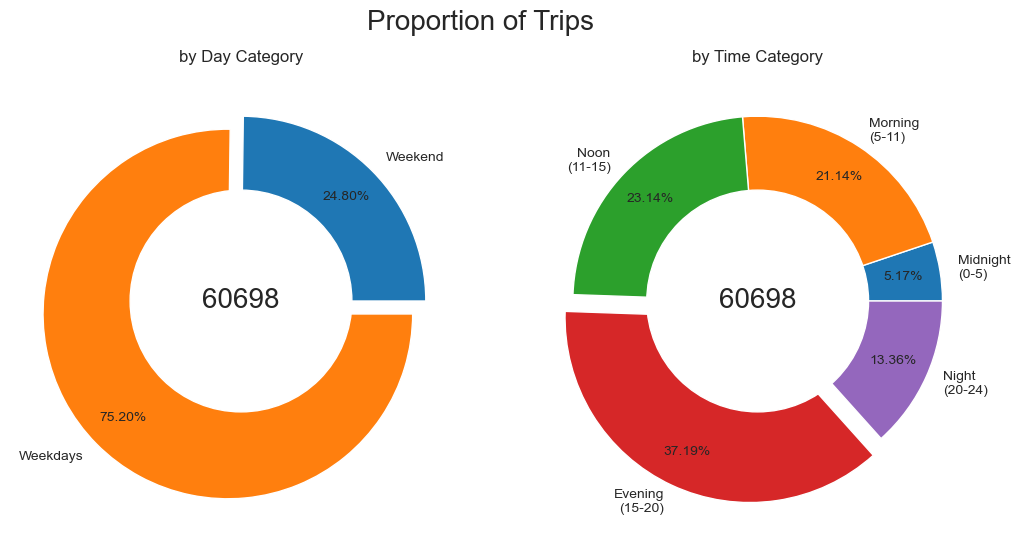

In [163]:
trip_hourly = df.groupby([df['lpep_pickup_datetime'].dt.hour, 'pickup_time']).agg(trip_byhour=('lpep_pickup_datetime', 'count')).reset_index()
trip_bytimecat = df.groupby('pickup_time').agg(trip_bytime=('pickup_time', 'count')).reset_index()
trip_time_merge = pd.merge(trip_hourly, trip_bytimecat, on='pickup_time', how='left')

plt.figure(figsize=(15,6))
plt.suptitle('Proportion of Trips', fontsize=20)

plt.subplot(1,2,1)

plt.pie(x=trip_merge['trip_bycat'].unique().tolist(), 
        labels=trip_merge['day_cat'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0.1), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, trip_merge['trip_bydate'].sum(), ha='center', va='center', fontsize=20)
plt.title('by Day Category')

plt.subplot(1,2,2)

labels = [f"{trip_time_merge['pickup_time'].unique().tolist()[0]}\n(0-5)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[1]}\n(5-11)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[2]}\n(11-15)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[3]}\n(15-20)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[4]}\n(20-24)"]

plt.pie(x=trip_time_merge['trip_bytime'].unique().tolist(), 
        labels=labels, 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0,0.1,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, trip_time_merge['trip_byhour'].sum(), ha='center', va='center', fontsize=20)
plt.title('by Time Category')

plt.subplots_adjust(wspace=-0.2) 
plt.show()

`Insights`

- Karena jumlah perjalanan pada weekdays yang meningkat dan weekend menurun, akhirnya perbedaan proporsi dan jumlah perjalanan pada hari weekdays dan weekend cukup signifikan.

- Waktu di sore hari merupakan puncak teramai perjalanan taksi hingga mencapai 37% dari total perjalanan pada bulan Januari.

- Sedangkan untuk waktu dengan jumlah perjalanan terendah yaitu pada waktu tengah malam mulai dari pukul 12:00 malam hingga pukul 05:00 pagi dengan jumlah hanya 5% dari total keseluruhan perjalanan pada bulan Januari.

# Demand berdasarkan daerah dan zona pickup

In [164]:
agg_borough = df.groupby('PUBorough').agg(count=('PUBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone = df.groupby('PUZone').agg(count=('PUZone', 'count')).sort_values(by='count', ascending=False).reset_index()

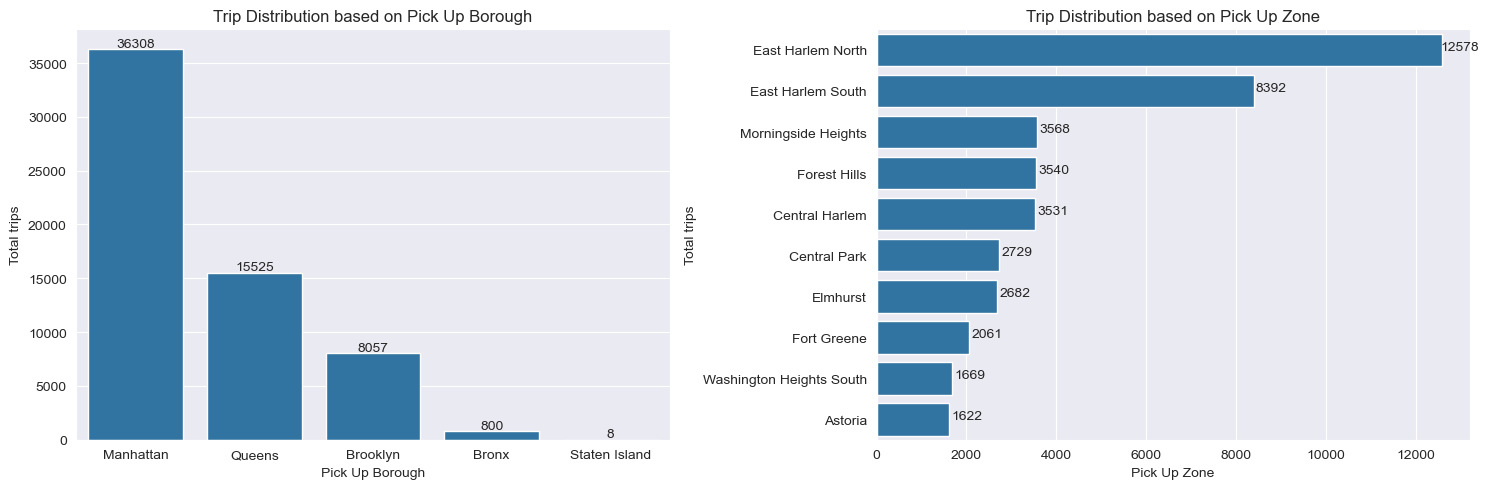

In [165]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
bars = sns.barplot(x=agg_borough['PUBorough'], 
                   y=agg_borough['count'])
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=agg_zone.head(10),
                   y='PUZone', 
                   x='count')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Zone')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')

plt.tight_layout()
plt.show()

Insight yang didapat dari 2 diagram ini adalah bahwa permintaan tertinggi untuk perjalanan taksi terjadi di wilayah Manhattan sebanyak 36rb perjalanan, yang diikuti Queens sebanyak 15rb, Brooklyn 8rb, dan State Island paling rendah dengan hanya 8 perjalanan saja.

Sedangkan 10 Zona yang paling tinggi permintaannya diantaranya East Harlem North dengan 12rb, East Harlem South 8rb hingga Astoria 1622 Perjalanan.

# Demand berdasarkan Rate Code, Tipe Bayar, dan Tipe Perjalanan

In [166]:
agg_ratecode = df.groupby('RatecodeID').agg(count=('RatecodeID', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_ratecode['RatecodeID'] = agg_ratecode['RatecodeID'].apply(lambda x: x if x == 'Standard rate' else 'Other')
agg_ratecode = agg_ratecode.groupby('RatecodeID').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_payment = df.groupby('payment_type').agg(count=('payment_type', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_payment['payment_type'] = agg_payment['payment_type'].apply(lambda x: x if x == 'Credit card' or x == 'Cash' else 'Other')
agg_payment = agg_payment.groupby('payment_type').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_triptype = df.groupby('trip_type').agg(count=('trip_type', 'count')).sort_values(by='count', ascending=False).reset_index()

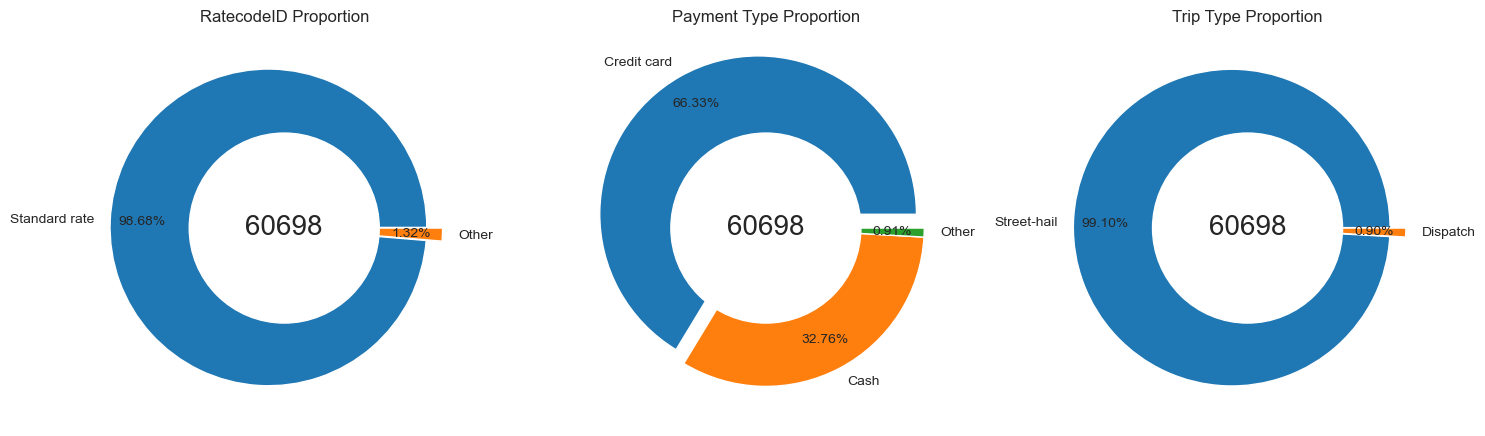

In [167]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=agg_ratecode['count'], 
        labels=agg_ratecode['RatecodeID'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('RatecodeID Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,2)
plt.pie(x=agg_payment['count'], 
        labels=agg_payment['payment_type'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Payment Type Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,3)
plt.pie(x=agg_triptype['count'], 
        labels=agg_triptype['trip_type'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Trip Type Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.tight_layout() 
plt.show()

Insight yang didapat dari 3 grafik ini adalah, kartu kredit merupakan jenis pembayaran yang sering dipakai pelanggan, secara umum pelanggan memakai standard fare untuk perjalanan taksi mereka, mayoritas pengguna taksi menggunakan taksi ini untuk perjalanan di dalam kota dan tipe perjalanan street hail

# Trip Amount Distribution

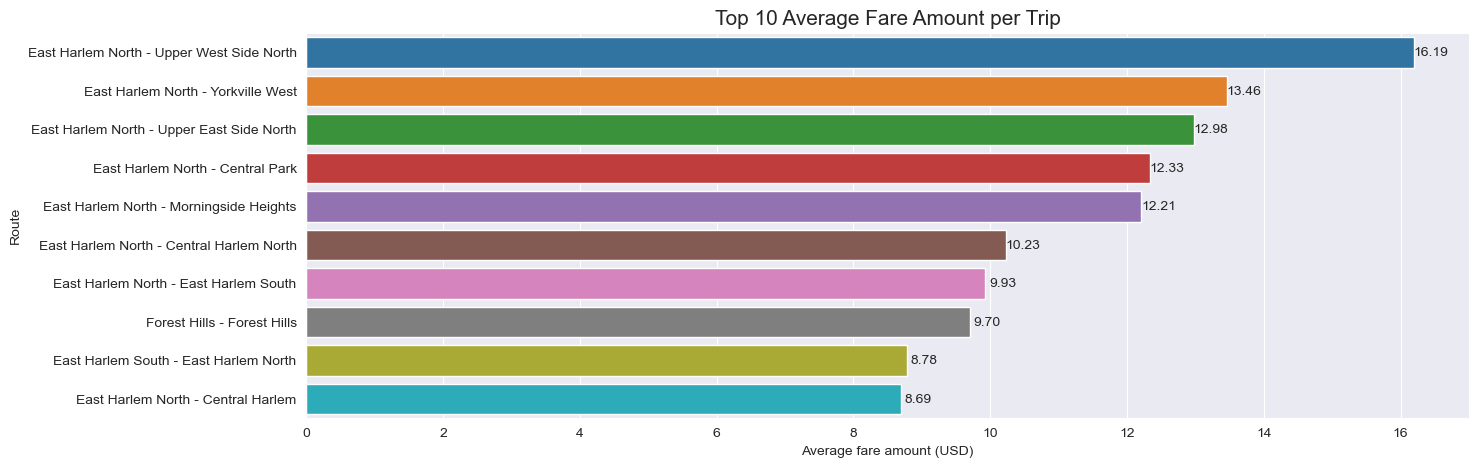

In [168]:
trip_amount_dist = df.groupby(['PUZone', 'DOZone']).agg(trip_count=('PUZone', 'count'),
                                                        total_fare=('fare_amount', 'sum'), 
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'), 
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)
route = trip_amount_dist['PUZone'] + " - " + trip_amount_dist['DOZone']
trip_amount_dist.insert(0, 'Route', route)
trip_amount_dist.drop(columns=['PUZone', 'DOZone'], inplace=True)

plt.figure(figsize=(15,5))
data = trip_amount_dist.sort_values(by='avg_fare', ascending=False)
bars = sns.barplot(data=data,
                   y='Route', 
                   x='avg_fare', 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{:.2f}".format(data['avg_fare'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.xlabel('Average fare amount (USD)')
plt.ylabel('Route')
plt.title('Top 10 Average Fare Amount per Trip', fontsize=15)

plt.show()

Insight yang didapat adalah perjalanan dari East Harlem North ke Upper West Side North merupakan perjalanan dengan fare amount tertinggi

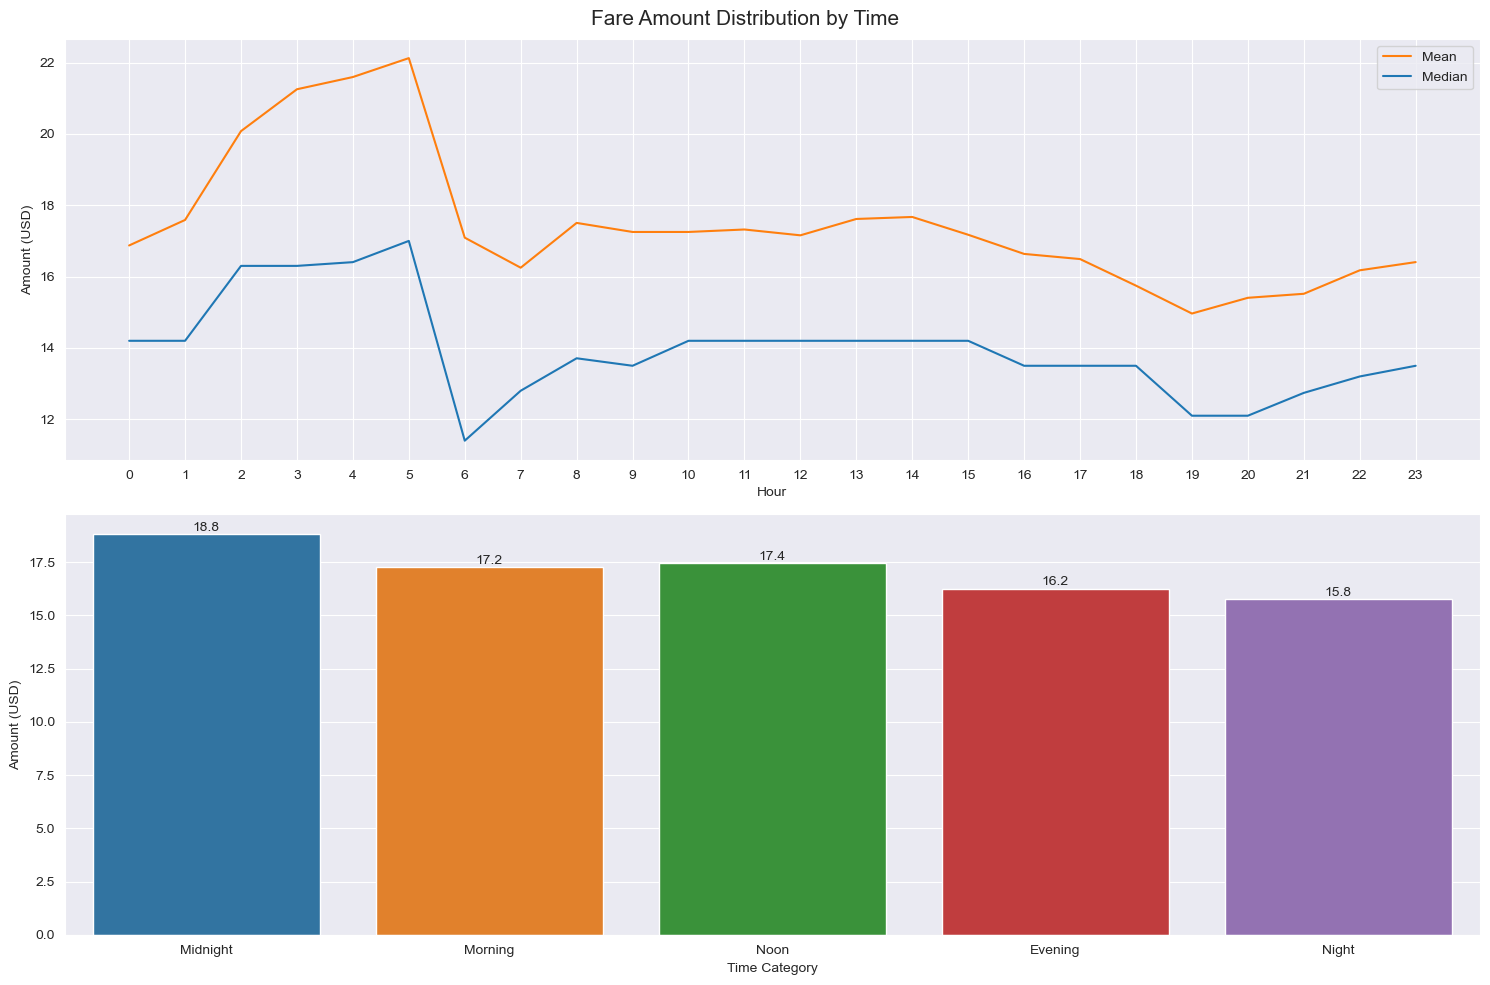

In [169]:
sort_time = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
amount_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour).agg(total_fare_amount=('fare_amount', 'sum'), 
                                                                    avg_fare_amount=('fare_amount', 'mean'), 
                                                                    median_fare_amount=('fare_amount', 'median')).reset_index()
amount_by_time = df.groupby('pickup_time').agg(total_fare_amount=('fare_amount', 'sum'), 
                                               avg_fare_amount=('fare_amount', 'mean'), 
                                               median_fare_amount=('fare_amount', 'median')).reindex(sort_time).reset_index().round(2)

plt.figure(figsize=(15,10))
plt.suptitle('Fare Amount Distribution by Time', fontsize=15)

plt.subplot(2,1,1)
sns.lineplot(data=amount_by_hour, 
             x='lpep_pickup_datetime', 
             y='avg_fare_amount', 
             color=color[1],
             label = 'Mean')
sns.lineplot(data=amount_by_hour, 
             x='lpep_pickup_datetime', 
             y='median_fare_amount', 
             color=color[0],
             label = 'Median')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Amount (USD)')


plt.subplot(2,1,2)
bars = sns.barplot(data=amount_by_time,
                   x='pickup_time', 
                   y='avg_fare_amount',
                   palette=color)

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.3
    label = "{:.1f}".format(amount_by_time['avg_fare_amount'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center', va='center')
plt.xlabel('Time Category')
plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

Insight dari 2 diagram ini:

- Harga rata-rata dalam sekali perjalanan di tengah malam yaitu pukul 00:00 - 05:00 relatif lebih mahal di bandingnya yang lainnya yaitu 19 USD.

- Harga rata-rata dalam sekali perjalanan terendah yaitu di malam hari pada pukul 20:00 - 00.00 dengan fare amount rata-rata 15 USD.

- Sementara di waktu yang lainnya seperti pagi, siang, dan sore relatif sama.

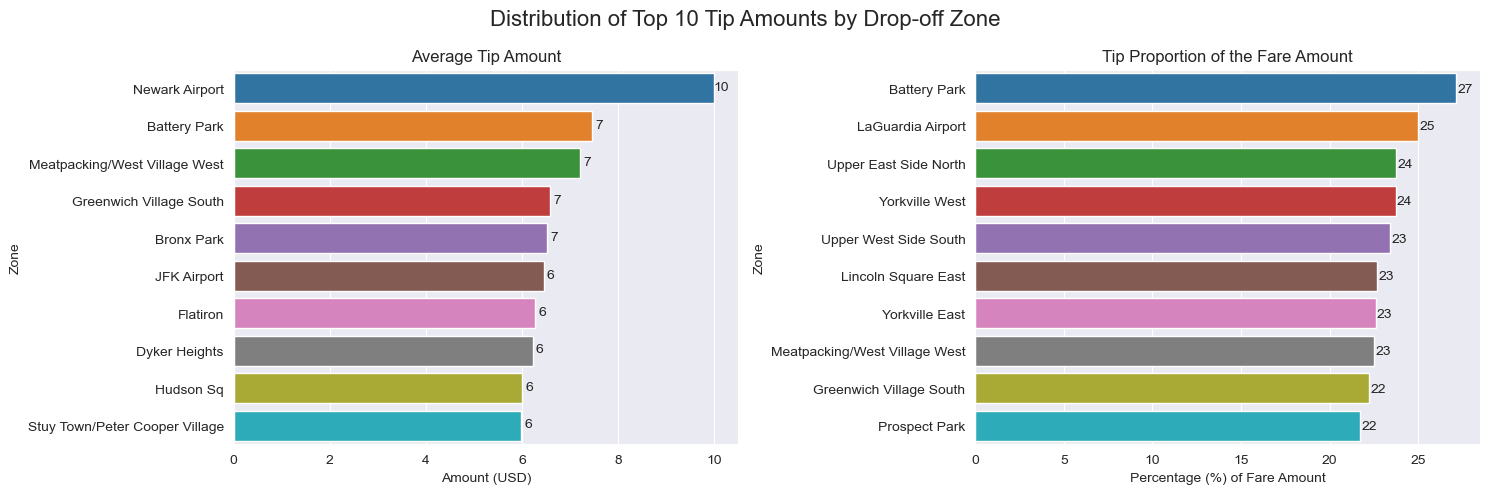

In [170]:
doloc_tip = df.groupby('DOZone').agg(count=('tip_amount', 'count'), 
                                     total_tip=('tip_amount', 'sum'), 
                                     median_tip=('tip_amount', 'median'), 
                                     median_fare=('fare_amount', 'median')).reset_index()
doloc_tip['proportion_of_tip'] = (doloc_tip['median_tip']/doloc_tip['median_fare']*100).round(2)

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Top 10 Tip Amounts by Drop-off Zone', fontsize=16)

plt.subplot(1,2,1)
data = doloc_tip[doloc_tip['count']>1].sort_values(by='median_tip', ascending=False).head(10).reset_index()
bars= sns.barplot(data=data,
            x='median_tip',
            y='DOZone', 
            palette=color)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2 + 0.05
    x_value = bar.get_width() + 0.15
    label = "{:.0f}".format(data['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Tip Amount')
plt.xlabel('Amount (USD)')
plt.ylabel('Zone')

plt.subplot(1,2,2)
data = doloc_tip[doloc_tip['count']>1].sort_values(by='proportion_of_tip', ascending=False).head(10).reset_index()
bars = sns.barplot(data=data,
            x='proportion_of_tip',
            y='DOZone', 
            palette=color)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.5
    label = "{:.0f}".format(data['proportion_of_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Tip Proportion of the Fare Amount')
plt.xlabel('Percentage (%) of Fare Amount')
plt.ylabel('Zone')

plt.tight_layout()
plt.show()

`Insight:`

- Top 10 rata-rata tip tertinggi yang diberikan penumpang berdasarkan besarnya tip yaitu mulai dari 6-10 USD dengan zona drop off Newark Airport yang memiliki hingga yang terakhir Stuy Town/Peter Cooper Village.

- Top 10 rata-rata tip tertinggi yang diberikan penumpang berdasarkan proporsi dari fare amount yaitu mulai dari 22-27% dari fare_amount dengan zona drop off Battery Park yang paling tinggi dan Prospect Park yang paling rendah.

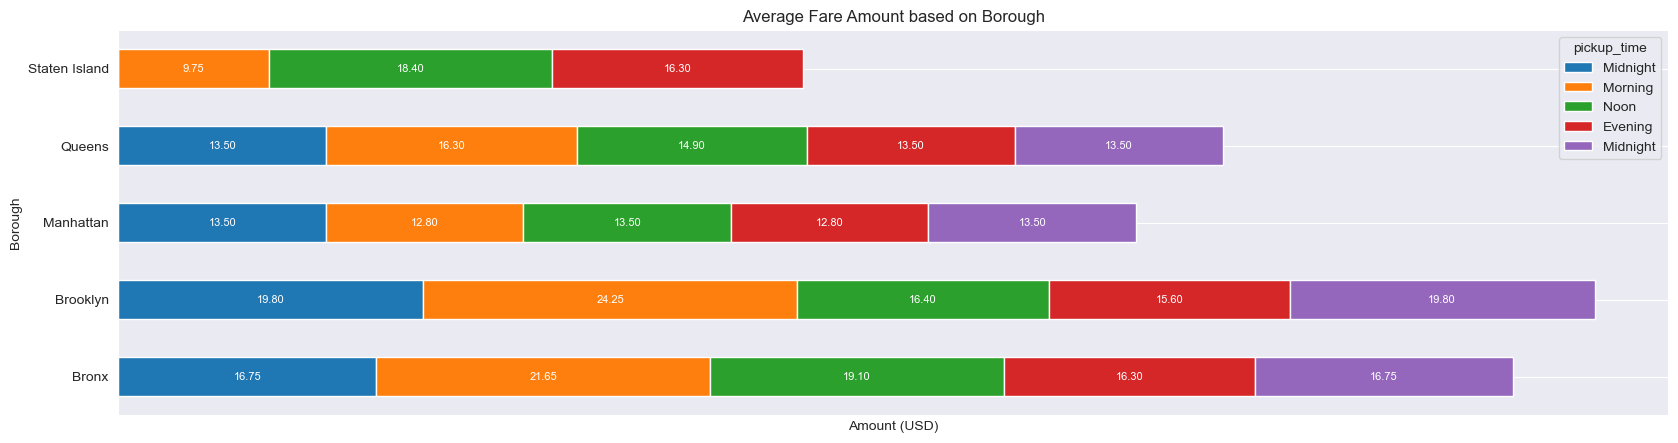

In [171]:
borough_amount_stack = df.pivot_table(index='PUBorough', columns='pickup_time', values='fare_amount', aggfunc='median').fillna(0)
borough_amount_stack = borough_amount_stack[['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']]
borough_tip = df.groupby(['PUBorough', 'pickup_time']).agg(median_tip=('tip_amount', 'median')).sort_values(by='median_tip', ascending=False).reset_index().round(2)

ax = borough_amount_stack.plot(kind='barh', stacked=True, color=color, figsize=(20,5))
plt.title('Average Fare Amount based on Borough')
plt.xlabel('Amount (USD)')
plt.ylabel('Borough')
plt.xticks([])
for idx, rect in enumerate(ax.patches):
    width = rect.get_width()
    if width > 0:
        y = rect.get_y() + rect.get_height() / 2
        cum_width_prev_segments = sum(borough_amount_stack.iloc[idx % len(borough_amount_stack), :idx // len(borough_amount_stack)])
        x = cum_width_prev_segments + width / 2
        plt.text(x, y, f"{width:.2f}", ha='center', va='center', color='white', fontsize=8)

plt.show()

`Insight:`

- Rata-rata fare amount dalam sekali perjalanan di wilayah Brooklyn pada pagi hari relatif lebih mahal di banding yang lainnya.

- Rata-rata fare amount terendahnya terdapat di Staten Island pada pagi hari.

- Tidak ada trip di Staten Island pada malam hari sampai tengah malam.

- Fare amount di setiap wilayah cenderung memiliki pola yang sama yaitu mengalami kenaikan di pagi hari kemudian penurunan mulai di siang hari gingga tengah malam kecuali wilayah Manhattan.

- Rata-rata fare amount di wilayah Manhattan cenderung memiliki harga yang sama mulai dari tengah malam maupun pagi, siang, sore, atau di malam hari.

## **Conclusion & Recommendation**

`Permintaan dan Preferensi Pelanggan`

- Permintaan taksi paling tinggi di bulan januari terjadi pada hari Rabu, 25 Januari 2023, sedangkan permintaan terendah pada 1 Januari 2023.

- Terdapat pola permintaan pada bulan Januari, Permintaan cenderung naik selama weekdays kemudian menurun ketika memasuki hari weekend.

- Puncak permintaan terjadi di sore hari, sementara permintaan paling rendah di tengah malam hingga pagi hari.

- Manhattan adalah wilayah dengan permintaan tertinggi, sedangkan State Island memiliki permintaan terendah.

- Pelanggan lebih cenderung menggunakan taksi dengan jenis tarif dalam kota dengan trip type street-hail (pemanggilan taksi dipinggir jalan) dan metode pembayaran dominan menggunakan kartu kredit atau tunai.

- Durasi perjalanan yang paling umum adalah antara 11-20 menit dan jarak yang kurang dari 2 mil.

`Distribusi Pendapatan Berdasarkan Waktu dan Wilayah`

- Terdapat rute-rute yang permintaan dan rata-rata tarif yang juga tinggi seperti dari East Harlem North ke Upper West Side North.

- Tarif rata-rata cenderung lebih mahal di tengah malam dan lebih murah di malam hari.

- Brooklyn memiliki tarif rata-rata tertinggi di pagi hari, sementara Staten Island memiliki tarif rata-rata termurah dan tidak memiliki perjalanan sama sekali di malam hari.

- Wilayah Manhattan menampilkan pola harga yang stabil sepanjang hari.

- Tip tertinggi biasanya diberikan untuk rute ke Newark Airport, sementara tip sebagai proporsi dari fare amount tertinggi terjadi di rute menuju Battery Park.

Kesimpulan : Permintaan taksi lebih tinggi pada hari kerja dibandingkan weekend, dengan sore hari menjadi waktu yang paling sibuk. Manhattan mendominasi dalam hal volume perjalanan, dengan tarif perjalanan dalam kota menjadi pilihan utama pelanggan.

**Rekomendasi:**

`Penjadwalan Armada Taksi`:

- Pastikan tersedianya armada taksi yang cukup pada weekdays atau hari kerja.

- Tambahkan lebih banyak armada di sore hari pada pukul 15:00 hingga 18:00.

- Kurangi operasi taksi pada hari weekend dan pada waktu tengah malam hingga dini hari.

`Penargetan Wilayah`:

- Tingkatkan jumlah taksi di wilayah Manhattan, Queens, dan Brooklyn karena memiliki permintaan yang lebih tinggi dibanding wilayah lain.

- Karena Brooklyn memiliki tarif rata-rata yang lebih tinggi di pagi hari, perusahaan taksi harus memastikan ketersediaan armada yang memadai di wilayah ini selama waktu tersebut.

- Mengkaji ulang alokasi armada di wilayah dengan permintaan rendah seperti Staten Island.

- Memberikan insentif atau bonus untuk driver yang beroperasi di wilayah dengan permintaan tinggi seperti Manhattan, Queens, Brooklyn.

`Strategi Berdasarkan Harga`:

- Prioritaskan layanan taksi pada rute-rute dengan fare amount rata-rata tertinggi seperti rute East Harlem North ke Upper West Side North, Upper Yorkville West, dan sebagainya.

- Pertimbangkan untuk penyesuaian tarif berdasarkan permintaan. Misalnya, naikkan tarif sebesar 1-3% saat puncak permintaan pada hari dan jam-jam tertentu.

- Tawarkan promo atau diskon pada saat-saat permintaan rendah, misalnya pada tengah malam atau awal pagi, untuk menarik lebih banyak pelanggan.

`Opsi Pembayaran`:

- Memastikan sistem pembayaran dengan credit card berfungsi dengan baik dan cepat mengingat ini menjadi pilihan pembayaran yang dominan.
    
- Pertimbangkan untuk menambah opsi pembayaran digital lain yang mungkin diminati pelanggan, seperti e-wallet atau aplikasi pembayaran digital lainnya.

`Peningkatan Kualitas Pelayanan`:

- Meskipun kecepatan berkendara memiliki korelasi yang lemah dengan tip, tetapi kecepatan berpengaruh terhadap jumlah tip yang diberikan. Maka penting untuk memastikan bahwa pengemudi berkendara dengan aman dan nyaman. Pelanggan mungkin memberikan tip lebih besar untuk perjalanan yang aman dan nyaman.

- Menambahkan program loyalitas atau diskon untuk pelanggan yang sering menggunakan taksi.

`Promosi dan Penawaran`:

- Luncurkan promosi khusus untuk rute dengan fare amount tertinggi untuk menarik lebih banyak pelanggan.

- Pertimbangkan untuk memberikan diskon atau penawaran khusus di waktu atau wilayah dengan fare amount rata-rata yang lebih rendah untuk menarik lebih banyak pelanggan.

- Tawarkan paket atau promosi untuk perjalanan dengan jarak dan durasi yang lebih lama, mengingat dua faktor ini juga memiliki korelasi positif dengan tip.

In [172]:
df.to_csv(r'NYC TLC Trip Record - Clean.csv', index= False)